В данном ноутбуке проведены исследования по 1-2 шагам из README:

    === ШАГ 1: Исследование данных ===
        ЭТАП 1: Исследование и анализ данных о клиентах
        ЭТАП 2: EDA
        ЭТАП 3: Объеденение данных и FEATURE ENGINEERING  
        ЭТАП 4: Сохранение данных
       

    === ШАГ 2: Подготовка инфраструктуры ===


=== ШАГ 1: Исследование данных ===  
ЭТАП 1: Исследование и анализ данных о клиентах  

Загружаем библиотеки необходимые для выполнения кода ноутбука.  

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

In [3]:
def load_data_safe(file_name):
    """
    загружает CSV файл с обработкой ошибок
    """
    try:
        df = pd.read_csv(file_name)
        print(f"УСПЕХ: {file_name} загружен")
        return df
    except FileNotFoundError:
        print(f"ОШИБКА: Файл {file_name} не найден")
        return None
    except Exception as e:
        print(f"ОШИБКА при загрузке {file_name}: {e}")
        return None

In [4]:
# Загрузка данных с обработкой ошибок
category_tree = load_data_safe(f'{PATH_DATA}/category_tree.csv')
events = load_data_safe(f'{PATH_DATA}/events.csv')
item_properties_part1 = load_data_safe(f'{PATH_DATA}/item_properties_part1.csv')
item_properties_part2 = load_data_safe(f'{PATH_DATA}/item_properties_part2.csv')


УСПЕХ: data/category_tree.csv загружен
УСПЕХ: data/events.csv загружен
УСПЕХ: data/item_properties_part1.csv загружен
УСПЕХ: data/item_properties_part2.csv загружен


In [5]:
# Выведем основную информацию о каждом датасете
print("=== category_tree ===")
category_tree.info()
category_tree.head(10)

=== category_tree ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


`category_tree.csv` — таблица из двух столбцов: «родительская категория» и «дочерняя категория». Типичный способ представления таблицы в виде дерева.

In [6]:
print("\n=== events ===")
events.info()
events.head(10)


=== events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


`events.csv` — таблица с логом событий:  
- `timestamp` — временная метка события,  
- `visitorid`— идентификатор пользователя,  
- `event` — событие (просмотр, добавление в корзину, покупка),  
- `itemid` — идентификатор товара,  
- `transactionid` — идентификатор транзакции (покупки)  

In [7]:
print("\n=== item_properties_part1 ===")
item_properties_part1.info()
item_properties_part1.head(10)


=== item_properties_part1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


`item_properties_part1.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [8]:
print("\n=== item_properties_part2 ===")
item_properties_part2.info()
item_properties_part2.head(10)


=== item_properties_part2 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
5,1433041200000,286407,202,820407
6,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
7,1437879600000,307534,888,150169 212349 1095303 824508 1257235 153900
8,1439089200000,102767,888,5135 790941 1055803 221748 122132 n12.000 1135...
9,1431831600000,215180,71,1096621


`item_properties_part2.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [9]:
# Объединим item_properties_part1 и item_properties_part2 в один датафрейм
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)
print(f"Объединенная таблица item_properties: {item_properties.shape[0]:,} строк")

Объединенная таблица item_properties: 20,275,902 строк


In [10]:
# Проверка на пропуски
print(" ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"   - category_tree пропуски: {category_tree.isnull().sum().sum()}")
print(f"   - events пропуски: {events.isnull().sum().sum()}")
print(f"   - item_properties пропуски: {item_properties.isnull().sum().sum()}")

 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
   - category_tree пропуски: 25
   - events пропуски: 2733644
   - item_properties пропуски: 0


In [11]:
print("\n ПРОВЕРКА ДУБЛИКАТОВ:")

# Полные дубликаты
cat_duplicates = category_tree.duplicated().sum()
events_duplicates = events.duplicated().sum()
item_props_duplicates = item_properties.duplicated().sum()

print(f"   - category_tree: {cat_duplicates:,} полных дубликатов")
print(f"   - events: {events_duplicates:,} полных дубликатов") 
print(f"   - item_properties: {item_props_duplicates:,} полных дубликатов")


 ПРОВЕРКА ДУБЛИКАТОВ:
   - category_tree: 0 полных дубликатов
   - events: 460 полных дубликатов
   - item_properties: 0 полных дубликатов


In [12]:
print("=" * 80)
print("ОЧИСТКА И ПОДГОТОВКА ДАННЫХ")
print("=" * 80)

# 1. Очистка дубликатов в events
print("1. ОЧИСТКА ДУБЛИКАТОВ:")
initial_events_size = len(events)

if events_duplicates > 0:
    events = events.drop_duplicates()
    print(f"    Удалено {events_duplicates} полных дубликатов из events")

# Проверим частичные дубликаты в events (более опасные!)
events_key_duplicates = events.duplicated(subset=['timestamp', 'visitorid', 'itemid', 'event']).sum()
print(f"   - events частичные дубликаты (ключевые поля): {events_key_duplicates:,}")

if events_key_duplicates > 0:
    events = events.drop_duplicates(subset=['timestamp', 'visitorid', 'itemid', 'event'])
    print(f" Удалено {events_key_duplicates} частичных дубликатов из events")

print(f" Размер events: {initial_events_size:,} → {len(events):,} строк")

# 2. Переименование столбцов в PEP8
print("\n2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):")

print("   До переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# Переименование согласно PEP8 (snake_case)
category_tree = category_tree.rename(columns={
    'categoryid': 'category_id',
    'parentid': 'parent_id'
})

events = events.rename(columns={
    'visitorid': 'visitor_id', 
    'itemid': 'item_id',
    'transactionid': 'transaction_id'
})

item_properties = item_properties.rename(columns={
    'itemid': 'item_id'
})

print("   После переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# 3. Детальный анализ пропусков
print("\n3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")

# В events
events_nulls = events.isnull().sum()
print(f"   - events:")
print(f"     transaction_id: {events_nulls['transaction_id']:,} пропусков")
print(f"     (это ожидаемо - пропуски для событий 'view' и 'addtocart')")

# В category_tree
category_nulls = category_tree.isnull().sum()
print(f"   - category_tree:")
print(f"     parent_id: {category_nulls['parent_id']:,} пропусков")
print(f"     (это корневые категории - ожидаемо)")

# В item_properties
item_props_nulls = item_properties.isnull().sum()
print(f"   - item_properties: {item_props_nulls.sum():,} пропусков")

# 4. Проверка целостности данных
print("\n4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")

# В category_tree - проверка "сиротских" parent_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - category_tree 'сиротских' parent_id: {len(orphan_parents)}")

# Проверка уникальности category_id
cat_id_duplicates = category_tree.duplicated(subset=['category_id']).sum()
print(f"   - category_tree дубликаты category_id: {cat_id_duplicates}")


ОЧИСТКА И ПОДГОТОВКА ДАННЫХ
1. ОЧИСТКА ДУБЛИКАТОВ:
    Удалено 460 полных дубликатов из events
   - events частичные дубликаты (ключевые поля): 0
 Размер events: 2,756,101 → 2,755,641 строк

2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):
   До переименования:
   - category_tree: ['categoryid', 'parentid']
   - events: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']
   - item_properties: ['timestamp', 'itemid', 'property', 'value']
   После переименования:
   - category_tree: ['category_id', 'parent_id']
   - events: ['timestamp', 'visitor_id', 'event', 'item_id', 'transaction_id']
   - item_properties: ['timestamp', 'item_id', 'property', 'value']

3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
   - events:
     transaction_id: 2,733,184 пропусков
     (это ожидаемо - пропуски для событий 'view' и 'addtocart')
   - category_tree:
     parent_id: 25 пропусков
     (это корневые категории - ожидаемо)
   - item_properties: 0 пропусков

4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - category_tree 'сиротских' par

In [13]:
print("\n" + "=" * 80)
print("ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ")
print("=" * 80)
print(f"events: {len(events):,} строк (удалено {initial_events_size - len(events):,} дубликатов)")
print(f"category_tree: {len(category_tree):,} строк")
print(f"item_properties: {len(item_properties):,} строк")
print(f"Столбцы переименованы в PEP8")


ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ
events: 2,755,641 строк (удалено 460 дубликатов)
category_tree: 1,669 строк
item_properties: 20,275,902 строк
Столбцы переименованы в PEP8


ЭТАП 2: EDA  

`category_tree.csv`

АНАЛИЗ category_tree
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parent_id: 25

2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


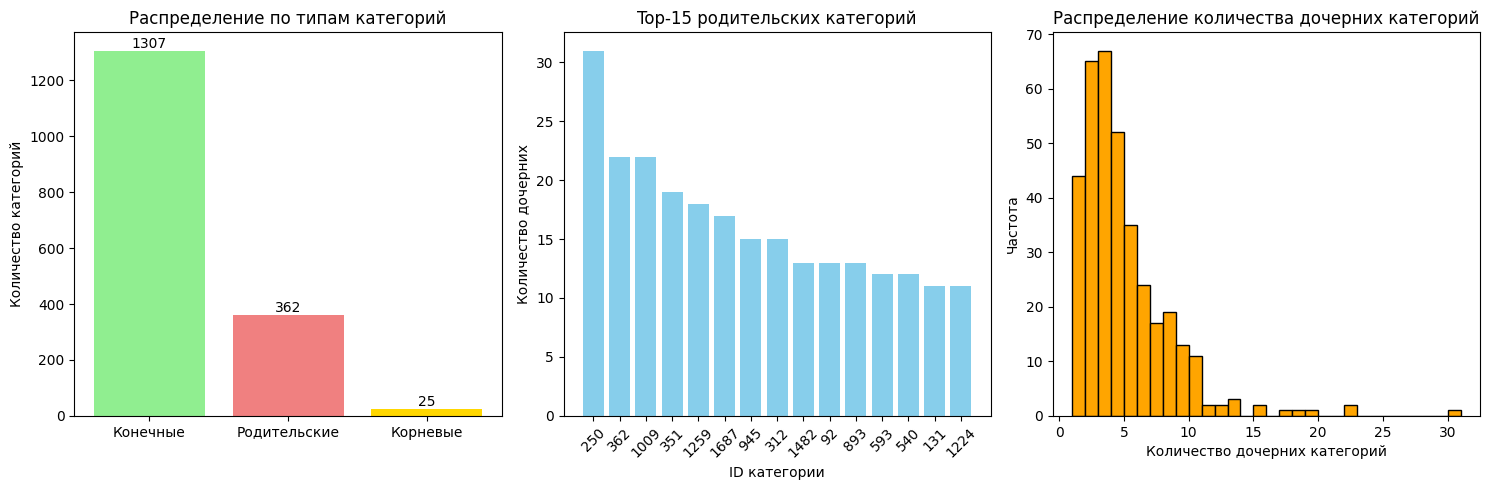

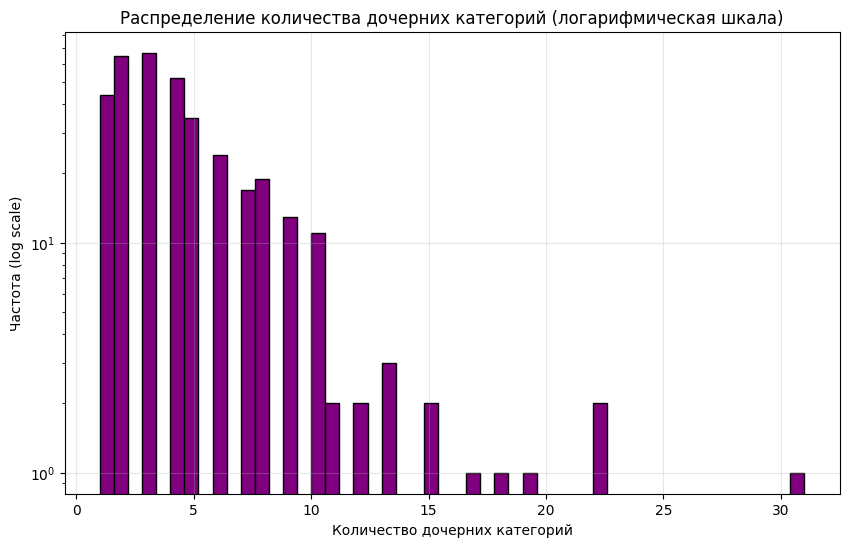


4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parent_id (нет в category_id): 0

6. СТАТИСТИКА:
       category_id    parent_id
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000


In [14]:
# Создаем папку для графиков
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print("АНАЛИЗ category_tree")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['category_id'].nunique():,}")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parent_id'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories = category_tree[category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Категорий, имеющих дочерние: {parent_categories['category_id'].nunique():,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Конечных категорий (без дочерних): {leaf_categories['category_id'].nunique():,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parent_id'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация с сохранением графиков
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
plt.bar(labels, category_types, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black')
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('mlflow_server/eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Дополнительные графики
# График 4: Распределение категорий (логарифмическая шкала)
plt.figure(figsize=(10, 6))
plt.hist(child_counts.values, bins=50, color='purple', edgecolor='black', log=True)
plt.title('Распределение количества дочерних категорий (логарифмическая шкала)')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)
plt.savefig(f'{ASSETS_DIR}/category_tree_distribution_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Детальный анализ топ-5 родительских категорий
print("\n4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 7. Проверка целостности данных
print("\n5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parent_id, но нет в category_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - 'Сиротских' parent_id (нет в category_id): {len(orphan_parents)}")

# 8. Статистика
print("\n6. СТАТИСТИКА:")
print(category_tree.describe())

In [15]:
print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)

print("\n СТРУКТУРА ДАННЫХ:")
print(f"- Всего {len(category_tree):,} категорий в иерархии")
print(f"- {len(root_categories):,} корневых категорий (основные разделы магазина)")
print(f"- {len(parent_categories):,} родительских категорий (средний уровень вложенности)") 
print(f"- {len(leaf_categories):,} конечных категорий (конкретные товарные группы)")

print("\n СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:")
print(f"- Максимальная ширина дерева: {child_counts.max()} дочерних у одного родителя")
print(f"- Среднее количество дочерних: {child_counts.mean():.1f} на родителя")
print(f"- Медианное количество: {child_counts.median():.1f} дочерних на родителя")
print(f"- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних")

print("\n КАЧЕСТВО ДАННЫХ:")
print(f"- Нет дубликатов - данные чистые")
print(f"- Нет сиротских категорий - все ссылки целостные")
print(f"- {category_tree['parent_id'].isna().sum()} пропусков (корневые категории - ожидаемо)")


ВЫВОДЫ ПО CATEGORY_TREE:

 СТРУКТУРА ДАННЫХ:
- Всего 1,669 категорий в иерархии
- 25 корневых категорий (основные разделы магазина)
- 362 родительских категорий (средний уровень вложенности)
- 1,307 конечных категорий (конкретные товарные группы)

 СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:
- Максимальная ширина дерева: 31 дочерних у одного родителя
- Среднее количество дочерних: 4.5 на родителя
- Медианное количество: 4.0 дочерних на родителя
- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних

 КАЧЕСТВО ДАННЫХ:
- Нет дубликатов - данные чистые
- Нет сиротских категорий - все ссылки целостные
- 25 пропусков (корневые категории - ожидаемо)


`events.csv`

In [16]:
# Создаем папку для графиков (если еще не создана)
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ EVENTS")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего событий: {len(events):,}")
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")
print(f"   - Уникальных товаров: {events['item_id'].nunique():,}")
print(f"   - Период данных: от {pd.to_datetime(events['timestamp'].min(), unit='ms')} до {pd.to_datetime(events['timestamp'].max(), unit='ms')}")

# 2. Анализ типов событий
print("\n2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:")
event_counts = events['event'].value_counts()
event_percentages = (event_counts / len(events)) * 100

for event, count in event_counts.items():
    percentage = event_percentages[event]
    print(f"   - {event}: {count:,} ({percentage:.1f}%)")

# 3. Анализ транзакций
print("\n3. АНАЛИЗ ТРАНЗАКЦИЙ:")
transactions = events[events['transaction_id'].notna()]
print(f"   - Всего транзакций (покупок): {transactions['transaction_id'].nunique():,}")
print(f"   - Уникальных товаров в покупках: {transactions['item_id'].nunique():,}")
print(f"   - Уникальных пользователей, совершивших покупки: {transactions['visitor_id'].nunique():,}")

# 4. НОВЫЕ МЕТРИКИ
print("\n4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:")

# Уникальные пользователи
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")

# Расчет пользователей, добавивших в корзину
addtocart_events = events[events['event'] == 'addtocart']
addtocart_users = addtocart_events['visitor_id'].nunique()

# Конверсия пользователей в покупки
conversion_rate = (transactions['visitor_id'].nunique() / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в покупки: {conversion_rate:.2f}%")

# Конверсия пользователей в корзину
addtocart_conversion = (addtocart_users / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в корзину: {addtocart_conversion:.2f}%")

# Конверсия из корзины в покупку
cart_to_purchase_rate = (transactions['visitor_id'].nunique() / addtocart_users) * 100
print(f"   - Конверсия из корзины в покупку: {cart_to_purchase_rate:.2f}%")

# Расчет статистики по пользователям
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)
user_stats.columns = ['total_events', 'unique_items']

# Средние события на пользователя
avg_events_per_user = user_stats['total_events'].mean()
print(f"   - Среднее событий на пользователя: {avg_events_per_user:.1f}")

# Среднее уникальных товаров на пользователя  
avg_items_per_user = user_stats['unique_items'].mean()
print(f"   - Среднее уникальных товаров на пользователя: {avg_items_per_user:.1f}")

# 5. Преобразование временных меток для анализа
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events['date'] = events['datetime'].dt.date
events['hour'] = events['datetime'].dt.hour
events['day_of_week'] = events['datetime'].dt.day_name()
events['month'] = events['datetime'].dt.month
events['year_month'] = events['datetime'].dt.to_period('M')


ГЛУБОКИЙ АНАЛИЗ EVENTS
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего событий: 2,755,641
   - Уникальных пользователей: 1,407,580
   - Уникальных товаров: 235,061
   - Период данных: от 2015-05-03 03:00:04.384000 до 2015-09-18 02:59:47.788000

2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:
   - view: 2,664,218 (96.7%)
   - addtocart: 68,966 (2.5%)
   - transaction: 22,457 (0.8%)

3. АНАЛИЗ ТРАНЗАКЦИЙ:
   - Всего транзакций (покупок): 17,672
   - Уникальных товаров в покупках: 12,025
   - Уникальных пользователей, совершивших покупки: 11,719

4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:
   - Уникальных пользователей: 1,407,580
   - Конверсия пользователей в покупки: 0.83%
   - Конверсия пользователей в корзину: 2.68%
   - Конверсия из корзины в покупку: 31.07%
   - Среднее событий на пользователя: 2.0
   - Среднее уникальных товаров на пользователя: 1.5


In [17]:
# 6. Анализ по месяцам
print("\n5. АНАЛИЗ ПО МЕСЯЦАМ:")
monthly_stats = events.groupby('year_month').agg({
    'visitor_id': 'nunique',
    'item_id': 'nunique',
    'event': 'count'
}).round(2)

monthly_stats.columns = ['unique_visitors', 'unique_items', 'total_events']
print("   Месяц | Уникальные посетители | Уникальные товары | Всего событий")
print("   " + "-" * 70)

for month, stats in monthly_stats.iterrows():
    print(f"   {month} | {stats['unique_visitors']:>18,} | {stats['unique_items']:>16,} | {stats['total_events']:>12,}")


5. АНАЛИЗ ПО МЕСЯЦАМ:
   Месяц | Уникальные посетители | Уникальные товары | Всего событий
   ----------------------------------------------------------------------
   2015-05 |            307,574 |          114,802 |      590,584
   2015-06 |            313,832 |          117,317 |      610,313
   2015-07 |            377,199 |          126,671 |      697,849
   2015-08 |            311,128 |          114,050 |      553,237
   2015-09 |            173,728 |           82,220 |      303,658


In [ ]:
# 7. Визуализация с сохранением графиков - ОПТИМИЗИРОВАННАЯ ВЕРСИЯ
plt.figure(figsize=(20, 15))

# ПЕРВАЯ СТРОКА: Основные метрики
# График 1: Распределение типов событий
plt.subplot(3, 4, 1)
colors = ['lightblue', 'lightcoral', 'lightgreen']

event_names_ru = {
    'view': 'Просмотр',
    'addtocart': 'В корзину', 
    'transaction': 'Покупка'
}

events_ru = [event_names_ru[event] for event in event_counts.index]
counts_ru = event_counts.values

bars = plt.bar(events_ru, counts_ru, color=colors, alpha=0.7)
plt.title('Распределение типов событий', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Тип события', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Увеличиваем верхний предел оси Y на 10%
plt.ylim(0, max(counts_ru) * 1.1)

# Добавляем значения на столбцы
for bar, count, percentage in zip(bars, counts_ru, event_percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# График 2: Конверсия по воронке
plt.subplot(3, 4, 2)
funnel_data = [
    events['visitor_id'].nunique(),
    addtocart_users,
    transactions['visitor_id'].nunique()
]
funnel_labels = ['Всего\nпосетителей', 'Добавили\nв корзину', 'Совершили\nпокупку']
funnel_colors = ['lightblue', 'lightcoral', 'lightgreen']

bars_funnel = plt.bar(funnel_labels, funnel_data, color=funnel_colors, alpha=0.7)
plt.title('Воронка конверсии', fontsize=12, fontweight='bold')
plt.ylabel('Количество пользователей', fontsize=10)

# Добавляем значения и проценты на воронку
for i, (bar, count) in enumerate(zip(bars_funnel, funnel_data)):
    height = bar.get_height()
    if i > 0:
        prev_count = funnel_data[i-1]
        conversion = (count / prev_count) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}\n({conversion:.1f}%)', ha='center', va='bottom', fontsize=8)
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom', fontsize=8)

# График 3: Активность по месяцам
plt.subplot(3, 4, 3)
monthly_activity = events.groupby('year_month').size()
monthly_activity.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Активность по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 4: Уникальные посетители по месяцам
plt.subplot(3, 4, 4)
monthly_visitors = events.groupby('year_month')['visitor_id'].nunique()
monthly_visitors.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Уникальные посетители по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество посетителей', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# ВТОРАЯ СТРОКА: Временные паттерны
# График 5: Активность по дням недели
plt.subplot(3, 4, 5)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity = events.groupby('day_of_week').size().reindex(weekday_order)
weekday_activity.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Активность по дням недели', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('День недели', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# График 6: Активность по часам
plt.subplot(3, 4, 6)
hourly_activity = events.groupby('hour').size()
hourly_activity.plot(kind='bar', color='green', alpha=0.7)
plt.title('Активность по часам суток', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Час дня', fontsize=10)
plt.xticks(fontsize=9)

# График 7: Уникальные товары по месяцам
plt.subplot(3, 4, 7)
monthly_items = events.groupby('year_month')['item_id'].nunique()
monthly_items.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Уникальные товары по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество товаров', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 8: Пустой слот для баланса или можно добавить другой график
plt.subplot(3, 4, 8)
# Можно добавить дополнительный график или оставить пустым для баланса
plt.text(0.5, 0.5, 'Дополнительная\nаналитика', ha='center', va='center', fontsize=14)
plt.axis('off')

# ТРЕТЬЯ СТРОКА: Распределения
# График 9: Распределение событий на пользователя
plt.subplot(3, 4, 9)
user_event_counts = events.groupby('visitor_id').size()
plt.hist(user_event_counts.values, bins=50, color='red', alpha=0.7, log=True)
plt.title('Событий на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 10: Распределение популярности товаров
plt.subplot(3, 4, 10)
item_popularity = events.groupby('item_id').size()
plt.hist(item_popularity.values, bins=50, color='brown', alpha=0.7, log=True)
plt.title('Популярность товаров\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на товар', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 11: Распределение уникальных товаров на пользователя
plt.subplot(3, 4, 11)
user_stats = events.groupby('visitor_id').agg({'item_id': 'nunique'})
plt.hist(user_stats['item_id'].values, bins=30, color='darkgreen', alpha=0.7, log=True)
plt.title('Уникальных товаров на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Уникальных товаров на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 12: Соотношение новых и вернувшихся пользователей (упрощенная версия)
plt.subplot(3, 4, 12)
user_first_visit = events.groupby('visitor_id')['datetime'].min()
user_visit_count = events.groupby('visitor_id').size()

single_visit_users = len(user_visit_count[user_visit_count == 1])
multiple_visit_users = len(user_visit_count[user_visit_count > 1])

returning_data = [single_visit_users, multiple_visit_users]
returning_labels = ['Однократные\nпосетители', 'Многократные\nпосетители']
returning_colors = ['lightgray', 'darkorange']

plt.pie(returning_data, labels=returning_labels, colors=returning_colors, autopct='%1.1f%%', startangle=90)
plt.title('Однократные vs Многократные\nпосетители', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/events_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Детальный анализ пользователей
print("\n6. 👥 ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:")
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)

user_stats.columns = ['total_events', 'unique_items']
print(f"   - Среднее событий на пользователя: {user_stats['total_events'].mean():.1f}")
print(f"   - Медиана событий на пользователя: {user_stats['total_events'].median():.1f}")
print(f"   - Среднее уникальных товаров на пользователя: {user_stats['unique_items'].mean():.1f}")
print(f"   - Максимум событий у одного пользователя: {user_stats['total_events'].max()}")

# 9. Топ-5 самых активных пользователей
print("\n7. ТОП-5 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ:")
top_users = user_stats.nlargest(5, 'total_events')
for i, (user_id, stats) in enumerate(top_users.iterrows(), 1):
    print(f"   {i}. User {user_id}: {stats['total_events']} событий, {stats['unique_items']} товаров")

# 10. Топ-5 самых популярных товаров
print("\n8. ТОП-5 САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ:")
top_items = item_popularity.nlargest(5)
for i, (item_id, count) in enumerate(top_items.items(), 1):
    print(f"   {i}. Item {item_id}: {count} событий")


In [ ]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО EVENTS:")
print("=" * 80)

print("ОСНОВНЫЕ МЕТРИКИ:")
print(f"- Всего {len(events):,} событий от {events['visitor_id'].nunique():,} пользователей")
print(f"- {events['item_id'].nunique():,} уникальных товаров")
print(f"- Период данных: {(events['datetime'].max() - events['datetime'].min()).days} дней (май-сентябрь 2015)")

print("\n РАСПРЕДЕЛЕНИЕ СОБЫТИЙ:")
print(f"- Доминируют просмотры: {event_percentages.iloc[0]:.1f}% всех событий")
print(f"- Низкая активность: всего {event_percentages.iloc[1]:.1f}% добавлений в корзину")
print(f"- Минимальные покупки: {event_percentages.iloc[2]:.1f}% транзакций")

print("\n БИЗНЕС-МЕТРИКИ И КОНВЕРСИЯ:")
print(f"- ОЧЕНЬ НИЗКАЯ конверсия: всего {conversion_rate:.2f}% пользователей совершают покупки")
print(f"- Мало вовлеченных: {addtocart_conversion:.2f}% пользователей добавляют в корзину")
print(f"- ХОРОШАЯ конверсия из корзины: {cart_to_purchase_rate:.2f}% (каждый 3-й покупает)")

print("\n ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"- Средняя активность: {user_stats['total_events'].mean():.1f} событий на пользователя")
print(f"- Низкое взаимодействие: {user_stats['unique_items'].mean():.1f} уникальных товаров на пользователя")
print(f"- Сильный разброс: от 1 до {user_stats['total_events'].max()} событий на пользователя")

print("\n СЕЗОННОСТЬ И ТРЕНДЫ:")
print(f"- Пик активности: июль 2015 ({monthly_stats.loc['2015-07', 'total_events']:,} событий)")
print(f"- Спад к сентябрю: {monthly_stats.loc['2015-09', 'total_events']:,} событий")
print(f"- Стабильный охват: 300K+ пользователей ежемесячно")


In [ ]:

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ:")
print("1. Фокус на ВОВЛЕЧЕНИЕ - нужно увеличивать переход от просмотров к действиям")
print("2. Улучшать конверсию в корзину - основной 'бутылочный горлышко'")
print("3. Персонализировать для 'холодных' пользователей - 97% только просматривают")
print("4. Использовать топ-товары (187946, 461686) как якорь для рекомендаций")
print("5. Учитывать временные паттерны - пики активности по часам/дням")

print(f"\n ГРАФИКИ СОХРАНЕНЫ: 'mlflow_server/eda_plots/events_analysis.png'")

все наблюдаемые выбросы оставляем:

1. Пользователи-выбросы:  
   - Это "супер-пользователи" - их поведение ценно для обучения  
   - Показывают максимальное вовлечение  
   - Помогают понять "идеальный" путь покупки  
2. Товары-выбросы:  
   - Это хиты - важно понимать что популярно  
   - Могут быть якорем для рекомендаций
3. Временные выбросы:    
   - Пики активности в определенные часы/дни  
   - Это паттерны, а не шум

`item_properties.csv`

In [ ]:
# Создаем папку для графиков
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print(" АНАЛИЗ item_properties")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей свойств: {len(item_properties):,}")
print(f"   - Уникальных товаров: {item_properties['item_id'].nunique():,}")
print(f"   - Уникальных свойств: {item_properties['property'].nunique():,}")
print(f"   - Период обновления свойств: от {pd.to_datetime(item_properties['timestamp'].min(), unit='ms')} до {pd.to_datetime(item_properties['timestamp'].max(), unit='ms')}")

# 2. Анализ пропусков
print("\n2. ПРОВЕРКА КАЧЕСТВА ДАННЫХ:")
print(f"   - Пропуски: {item_properties.isnull().sum().sum()}")
print(f"   - Дубликаты: {item_properties.duplicated().sum()}")

# 3. Анализ самых частых свойств
print("\n3. ТОП-20 САМЫХ ЧАСТЫХ СВОЙСТВ ТОВАРОВ:")
top_properties = item_properties['property'].value_counts().head(20)
for prop, count in top_properties.items():
    percentage = (count / len(item_properties)) * 100
    print(f"   - {prop}: {count:,} ({percentage:.1f}%)")


In [ ]:
# 4. Анализ товаров с наибольшим количеством свойств
print("\n4. АНАЛИЗ ТОВАРОВ ПО КОЛИЧЕСТВУ СВОЙСТВ:")
props_per_item = item_properties.groupby('item_id').size()
print(f"   - Максимум свойств у одного товара: {props_per_item.max()}")
print(f"   - Среднее свойств на товар: {props_per_item.mean():.1f}")
print(f"   - Медиана свойств на товар: {props_per_item.median():.1f}")

# 5. Преобразование временных меток
item_properties['datetime'] = pd.to_datetime(item_properties['timestamp'], unit='ms')
item_properties['date'] = item_properties['datetime'].dt.date
item_properties['year_month'] = item_properties['datetime'].dt.to_period('M')

# 6. Анализ по месяцам
print("\n5. ОБНОВЛЕНИЕ СВОЙСТВ ПО МЕСЯЦАМ:")
monthly_updates = item_properties.groupby('year_month').size()
print("   Месяц | Обновлений свойств")
print("   " + "-" * 30)
for month, count in monthly_updates.items():
    print(f"   {month} | {count:>15,}")

# 7. Анализ значений для ключевых свойств
print("\n6. АНАЛИЗ ЗНАЧЕНИЙ КЛЮЧЕВЫХ СВОЙСТВ:")

# Смотрим на категории (самое частое свойство)
if 'categoryid' in item_properties['property'].values:
    category_values = item_properties[item_properties['property'] == 'categoryid']['value']
    print(f"   - Уникальных категорий в свойствах: {category_values.nunique()}")
    print(f"   - Примеры категорий: {category_values.value_counts().head(5).to_dict()}")

# Анализ availability (доступности товаров)
if 'available' in item_properties['property'].values:
    available_values = item_properties[item_properties['property'] == 'available']['value']
    print(f"   - Статусы доступности: {available_values.value_counts().to_dict()}")


In [ ]:

# 8. Визуализация
plt.figure(figsize=(20, 12))

# График 1: Топ-15 свойств товаров
plt.subplot(2, 3, 1)
top_15_props = item_properties['property'].value_counts().head(15)
plt.barh(top_15_props.index, top_15_props.values, color='lightblue')
plt.title('Топ-15 свойств товаров')
plt.xlabel('Количество записей')
plt.gca().invert_yaxis()

# График 2: Распределение количества свойств на товар
plt.subplot(2, 3, 2)
plt.hist(props_per_item.values, bins=50, color='lightcoral', alpha=0.7, log=True)
plt.title('Распределение свойств на товар\n(логарифмическая шкала)')
plt.xlabel('Количество свойств на товар')
plt.ylabel('Частота (log scale)')

# График 3: Обновление свойств по месяцам
plt.subplot(2, 3, 3)
monthly_updates.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Обновление свойств по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

# График 4: Топ-10 товаров по количеству свойств
plt.subplot(2, 3, 4)
top_items_props = props_per_item.nlargest(10)
plt.bar([str(x) for x in top_items_props.index], top_items_props.values, color='orange')
plt.title('Топ-10 товаров по количеству свойств')
plt.xlabel('ID товара')
plt.ylabel('Количество свойств')
plt.xticks(rotation=45)

# График 5: Распределение длины значений свойств
plt.subplot(2, 3, 5)
value_lengths = item_properties['value'].str.len()
plt.hist(value_lengths, bins=50, color='purple', alpha=0.7, log=True)
plt.title('Распределение длины значений свойств\n(логарифмическая шкала)')
plt.xlabel('Длина значения свойства')
plt.ylabel('Частота (log scale)')

# График 6: Активность обновления свойств по дням
plt.subplot(2, 3, 6)
daily_updates = item_properties.groupby('date').size()
daily_updates.plot(color='teal', alpha=0.7)
plt.title('Активность обновления свойств по дням')
plt.xlabel('Дата')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/item_properties_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

# 9. Детальный анализ
print("\n7. ДЕТАЛЬНЫЙ АНАЛИЗ:")
print(f"   - Топ-5 товаров с наибольшим количеством свойств:")
top_5_items = props_per_item.nlargest(5)
for i, (item_id, count) in enumerate(top_5_items.items(), 1):
    print(f"     {i}. Item {item_id}: {count} свойств")

print(f"\n   - Топ-5 самых редких свойств:")
rare_props = item_properties['property'].value_counts().tail(5)
for prop, count in rare_props.items():
    print(f"     - {prop}: {count} записей")

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО items_properties:")
print("=" * 80)
print(f"- Всего {len(item_properties):,} записей свойств")
print(f"- {item_properties['item_id'].nunique():,} товаров имеют свойства") 
print(f"- {item_properties['property'].nunique():,} уникальных свойств")
print(f"- Качество данных: отличное (0 пропусков)")
print(f"- Графики сохранены в 'eda_plots/item_properties_analysis.png'")

In [ ]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО ITEM_PROPERTIES:")
print("=" * 80)

print(" ОСНОВНЫЕ МЕТРИКИ:")
print(f" Огромный объем данных: {len(item_properties):,} записей свойств")
print(f" Широкий ассортимент: {item_properties['item_id'].nunique():,} товаров с характеристиками")
print(f" Богатая атрибутика: {item_properties['property'].nunique():,} уникальных свойств")

print("\n СТРУКТУРА СВОЙСТВ:")
print(f" Доминируют числовые свойства: '888' (14.8%), '790' (8.8%)")
print(f" Важные категориальные: 'categoryid' (3.9%), 'available' (7.4%)")
print(f" Сбалансированное распределение: 48.6 свойств на товар в среднем")

print("\n ДИНАМИКА ОБНОВЛЕНИЙ:")
print(f" Пик активности: май 2015 ({monthly_updates.loc['2015-05']:,} обновлений)")
print(f" Постепенное снижение: до {monthly_updates.loc['2015-09']:,} в сентябре")
print(f" Постоянное обновление: свойства меняются регулярно")

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f" Категории: 1,242 уникальных категорий (больше чем в category_tree)")
print(f" Доступность: {available_values.value_counts().to_dict()} (64% товаров доступны)")
print(f" Детализация: товары имеют от 1 до 468 свойств")


In [ ]:
category_tree

In [ ]:
events

In [ ]:
item_properties

 ЭТАП 3: Объеденение данных

In [ ]:
print("=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ")
print("=" * 80)

# 1. Анализ пересечений между таблицами
print("1. АНАЛИЗ ПЕРЕСЕЧЕНИЙ МЕЖДУ ТАБЛИЦАМИ")

# Товары в events vs item_properties
events_items = set(events['item_id'].unique())
props_items = set(item_properties['item_id'].unique())

print(f"- Уникальных товаров в events: {len(events_items):,}")
print(f"   - Уникальных товаров в item_properties: {len(props_items):,}")
print(f"   - Пересечение: {len(events_items & props_items):,} товаров")

# Категории в item_properties vs category_tree
props_categories = set(item_properties[item_properties['property'] == 'categoryid']['value'].astype(int))
tree_categories = set(category_tree['category_id'].unique())

print(f"   - Категорий в свойствах: {len(props_categories):,}")
print(f"   - Категорий в category_tree: {len(tree_categories):,}")
print(f"   - Пересечение: {len(props_categories & tree_categories):,} категорий")


In [ ]:
# 2. Получаем актуальные категории товаров
print("\n2. ПОЛУЧАЕМ АКТУАЛЬНЫЕ КАТЕГОРИИ ТОВАРОВ")

latest_categories = (
    item_properties[item_properties['property'] == 'categoryid']
    .sort_values('timestamp', ascending=False)
    .groupby('item_id')
    .first()
    .reset_index()[['item_id', 'value']]
    .rename(columns={'value': 'category_id'})
)
latest_categories['category_id'] = latest_categories['category_id'].astype(int)

print(f"   - Товаров с категориями: {len(latest_categories):,}")

# 3. Объединяем events с категориями
print("\n3. ОБЪЕДИНЯЕМ EVENTS С КАТЕГОРИЯМИ")

events_with_cats = events.merge(latest_categories, on='item_id', how='left')
print(f"   - Событий с категориями: {events_with_cats['category_id'].notna().sum():,}")

# 4. Добавляем иерархию категорий
print("\n4. ДОБАВЛЯЕМ ИЕРАРХИЮ КАТЕГОРИЙ")

final_data = events_with_cats.merge(category_tree, on='category_id', how='left')
print(f"   - Событий с полной иерархией: {final_data['parent_id'].notna().sum():,}")


In [ ]:
# 5. Добавляем целевые переменные
print("\n5. ДОБАВЛЯЕМ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ")

final_data['target_addtocart'] = (final_data['event'] == 'addtocart').astype(int)
final_data['was_purchased'] = (final_data['event'] == 'transaction').astype(int)

print(f"   - Добавлений в корзину: {final_data['target_addtocart'].sum():,}")
print(f"   - Покупок: {final_data['was_purchased'].sum():,}")
print(f"   - Доля добавлений в корзину: {final_data['target_addtocart'].mean()*100:.2f}%")
print(f"   - Доля покупок: {final_data['was_purchased'].mean()*100:.2f}%")

In [ ]:

# 6. Финальная проверка
print("\n6. ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ")

print(f"   - Итоговый размер: {len(final_data):,} строк")
print(f"   - Покрытие категориями: {final_data['category_id'].notna().sum()/len(final_data)*100:.1f}%")
print(f"   - Сохранена структура: {len(final_data) == len(events)}")
print(f"   - Добавленные фичи: target_addtocart, was_purchased")

print("\n" + "=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ ЗАВЕРШЕНО!")
print("=" * 80)
print("РЕЗУЛЬТАТ:")
print(f"- {len(final_data):,} событий")
print(f"- {final_data['category_id'].notna().sum():,} событий с категориями")
print(f"- {final_data['target_addtocart'].sum():,} добавлений в корзину")
print(f"-  {final_data['was_purchased'].sum():,} покупок")

In [ ]:
final_data.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Добавляем рейтинг
final_data['rating_count'] = final_data.groupby('item_id')['visitor_id'].transform('count')

scaler = MinMaxScaler()
final_data['rating'] = scaler.fit_transform(final_data[['rating_count']])

# Удаляем временную колонку
final_data = final_data.drop('rating_count', axis=1)

# Проверяем
print(final_data[['item_id', 'rating']].head())
print(f"Rating range: {final_data['rating'].min():.3f} - {final_data['rating'].max():.3f}")

In [ ]:
# Добавляем информацию о доступности товаров

availability = item_properties[item_properties['property'] == 'available']\
    .sort_values('timestamp')\
    .drop_duplicates('item_id', keep='last')[['item_id', 'value']]\
    .rename(columns={'value': 'available'})

final_data = final_data.merge(availability, on='item_id', how='left')
final_data['available'] = final_data['available'].fillna('0')

# Преобразуем формат времени
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'], unit='ms').dt.strftime('%Y-%m-%d %H:%M')

# Создаем фичу day из timestamp
final_data['day'] = pd.to_datetime(final_data['timestamp']).dt.day

print("колонка day:")
print(f"Уникальные значения: {sorted(final_data['day'].unique())}")
print(f"Диапазон: {final_data['day'].min()} - {final_data['day'].max()}")

In [ ]:
# ПРЕОБРАЗУЕМ transaction_id в бинарную фичу
final_data['transaction_id'] = final_data['transaction_id'].notna().astype(int)

In [ ]:

# Выбираем только нужные колонки для нового датасета
optimal_columns = [
    'timestamp',        # для split и аналитики
    'visitor_id',       # идентификатор пользователя
    'item_id',          # идентификатор товара
    'event',            # тип события (view/addtocart/transaction)
    'transaction_id',   # идентификатор транзакции
    'hour',             # час дня (ML фича)
    'day_of_week',      # день недели (ML фича) 
    'day',              # день месяца (ML фича)
    'month',            # месяц (ML фича)
    'category_id',      # категория товара
    'parent_id',        # родительская категория
    'rating',           # популярность товара
    'available',        # доступность товара
    'target_addtocart', # целевая переменная - добавление в корзину
    #'was_purchased'     # целевая переменная - покупка
]

# Создаем оптимальный датасет
final_data = final_data[optimal_columns].copy()

print(f"Размер: {final_data.shape}")
print(f"Колонки: {list(final_data.columns)}")

In [ ]:
final_data

In [ ]:
# Смотрим топ-10 товаров по рейтингу

final_data.drop_duplicates(subset='item_id').sort_values('rating', ascending=False).head(10)

In [ ]:
# Смотрим топ по рейтингу среди купленных товаров

final_data[final_data['target_addtocart']==1].drop_duplicates(subset='item_id').sort_values('rating', ascending=False).head(10)

In [ ]:
# Преобразуем категориальные фичи в числовые для корреляции
corr_data = final_data.copy()

# 1. Преобразуем day_of_week в числа
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
corr_data['day_of_week_num'] = corr_data['day_of_week'].map(day_map)

# 2. Преобразуем event в числа (one-hot будет слишком много, используем label encoding)
event_map = {'view': 0, 'addtocart': 1, 'transaction': 2}
corr_data['event_num'] = corr_data['event'].map(event_map)

# 3. available уже числовой (0/1)
corr_data['available'] = corr_data['available'].astype(int)

# 4. transaction_id уже числовой (0/1)

# Выбираем числовые колонки для корреляции
numeric_columns = [
    'hour', 'day_of_week_num', 'day', 'month', 
    'category_id', 'parent_id', 'rating', 'available',
    'transaction_id', 'event_num',  # преобразованные фичи
    'target_addtocart'              # основной таргет
]

# Удаляем пропуски для корреляции
corr_matrix = corr_data[numeric_columns].dropna().corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции признаков с target_addtocart', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/correlation_matrix_final.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(" Корреляция с target_addtocart:")
print("=" * 55)

target_correlations = corr_matrix['target_addtocart'].sort_values(ascending=False)

for feature, corr in target_correlations.items():
    if feature != 'target_addtocart':
        print(f"{feature:20} : {corr:+.4f}")

ЭТАП 4: Сохранение данных

In [ ]:
# Проверка данных на пропуски
print(" ПРОВЕРКА ДАННЫХ:")
print("=" * 30)

for col in final_data.columns:
    null_count = final_data[col].isnull().sum()
    if null_count > 0:
        print(f" {col}: {null_count:,} пропусков")
    else:
        print(f" {col}: OK")

print(f"\n Всего строк: {len(final_data):,}")
print(f" Всего колонок: {len(final_data.columns)}")

In [ ]:
print("🔍 ПРОВЕРКА ЗНАЧЕНИЯ 0 В ПРИЗНАКАХ:")
print("=" * 35)

print(f"category_id = 0: {(final_data['category_id'] == 0).sum():,}")
print(f"parent_id = 0: {(final_data['parent_id'] == 0).sum():,}")

In [ ]:
# Проверим совпадение пропусков
print("🔍 ПРОВЕРКА СОВПАДЕНИЯ ПРОПУСКОВ:")
print("=" * 35)

same_nulls = (final_data['category_id'].isnull() == final_data['parent_id'].isnull()).all()
print(f"Пропуски совпадают: {same_nulls}")

if same_nulls:
    null_count = final_data['category_id'].isnull().sum()
    print(f"Всего строк с пропусками: {null_count:,}")
    print(f"Это {null_count/len(final_data)*100:.1f}% данных")

In [ ]:
print("🔍 ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 30)

# Разные комбинации пропусков
only_category_null = (final_data['category_id'].isnull() & final_data['parent_id'].notnull()).sum()
only_parent_null = (final_data['category_id'].notnull() & final_data['parent_id'].isnull()).sum()
both_null = (final_data['category_id'].isnull() & final_data['parent_id'].isnull()).sum()

print(f"Только category_id пропущен: {only_category_null:,}")
print(f"Только parent_id пропущен: {only_parent_null:,}") 
print(f"Оба пропущены: {both_null:,}")
print(f"Всего пропусков category_id: {final_data['category_id'].isnull().sum():,}")
print(f"Всего пропусков parent_id: {final_data['parent_id'].isnull().sum():,}")

In [ ]:
# Посмотрим на товары без категорий
no_category_items = final_data[final_data['category_id'].isnull()]['item_id'].nunique()
print(f"📦 Уникальных товаров без категорий: {no_category_items:,}")

# Посмотрим есть ли у них взаимодействия
no_category_events = final_data[final_data['category_id'].isnull()]['event'].value_counts()
print("📊 События товаров без категорий:")
print(no_category_events)

Причины оставить:
1. 49K товаров - значительная часть ассортимента
 2. 833 добавления в корзину - реальный спрос
 3. 475 покупок - товары продаются
 4. Могут быть новинки или товары в процессе категоризации

In [ ]:
final_data['category_id'] = final_data['category_id'].fillna(-1).astype(int)
final_data['parent_id'] = final_data['parent_id'].fillna(-1).astype(int)

print(" Данные сохранены, пропуски заполнены -1")

In [ ]:
# Сохраняем
final_data.to_parquet(f'{PATH_DATA}/final_data.parquet', index=False)

Основные столбцы для коллабротивной фильтрации:  
essential_cols = ['visitor_id', 'item_id', 'event', 'timestamp']  
- visitor_id, item_id - для user-item матрицы  
- event - для весов взаимодействий  
- timestamp - для временного разделения  

Фичи для гибридной модели:  
- additional_features = ['category_id', 'parent_id', 'rating', 'available', 'hour', 'day', 'month']  
  
target_addtocart для оценки рекомендаций. Будем смотреть, рекомендуем ли товары которые добавляют в корзину

Разбиение данных

In [ ]:
# Разбиваем данные на тренировочную, тестовую выборки.

# Преобразуем timestamp в datetime
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'])

# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2015-08-01 00:00:00")

# Фильтрация данных на основе условия
train_test_global_time_split_idx = final_data["timestamp"] < train_test_global_time_split_date
events_train = final_data[train_test_global_time_split_idx]
events_test = final_data[~train_test_global_time_split_idx]

print(events_train.shape)
print(events_test.shape)

In [ ]:
display(events_train['timestamp'].describe())
display(events_test['timestamp'].describe())

In [ ]:
# количество пользователей в train и test
print(len(events_train["visitor_id"].drop_duplicates()))
print(len(events_test["visitor_id"].drop_duplicates()))

In [ ]:
# количество пользователей в train и test
users_train = events_train["visitor_id"].drop_duplicates()
users_test = events_test["visitor_id"].drop_duplicates()
# Количество пользователей, которые есть и в train, и в test
common_users = set(users_train).intersection(set(users_test))

print(len(users_train), len(users_test), len(common_users))

In [ ]:
# Холодные пользователи. Те кто есть в тест, но нет в трейн
cold_users = users_test[~users_test.isin(common_users)]

print(len(cold_users))

In [ ]:
# анализ холодного старта
items_in_train = set(events_train.item_id.unique())
items_in_test = set(events_test.item_id.unique())
items_diff = items_in_test.difference(items_in_train)

print(f"Идентификаторов товара в train: {len(items_in_train):,}")
print(f"Идентификаторов товара в test: {len(items_in_test):,}")
print(f"Новых идентификаторов товара в test (cold start): {len(items_diff):,} ({len(items_diff)/len(items_in_test)*100:.1f}%)")

In [ ]:
# Дропаем items в test которых нет в train
original_test_size = len(events_test)
events_test = events_test[events_test['item_id'].isin(items_in_train)]
print(f"Test set после фильтрации: {len(events_test):,} (удалено {original_test_size - len(events_test):,} событий)")

In [ ]:
# проверяем
items_in_test = set(events_test.item_id.unique())
items_diff = items_in_test.difference(items_in_train)
len(items_diff)

In [ ]:
print(f"Train size: {len(events_train):,} ({len(events_train)/len(events)*100:.1f}%)")
print(f"Test size: {len(events_test):,} ({len(events_test)/len(events)*100:.1f}%)")

In [ ]:
# Сохраняем холодных пользователей
cold_users.to_csv(f'{PATH_DATA}/cold_users.csv', index=False)

In [ ]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Проверим текущее состояние
print("До кодирования:")
print(f"Уникальных пользователей: {final_data['visitor_id'].nunique():,}")
print(f"Min visitor_id: {final_data['visitor_id'].min()}")
print(f"Max visitor_id: {final_data['visitor_id'].max()}")


In [ ]:
'''
!!! утечка данных

# Пересоздаем кодировщик
user_encoder = LabelEncoder()

# Обучаем на уникальных пользователях
user_encoder.fit(events_train["visitor_id"].unique())

# Применяем преобразование
final_data["visitor_id_enc"] = user_encoder.transform(final_data["visitor_id"])
events_train["visitor_id_enc"] = user_encoder.transform(events_train["visitor_id"])
events_test["visitor_id_enc"] = user_encoder.transform(events_test["visitor_id"])

print("\n Пользователи закодированы")
print(f"Уникальных пользователей: {len(user_encoder.classes_):,}")
print(f"Min visitor_id_enc: {final_data['visitor_id_enc'].min()}")
print(f"Max visitor_id_enc: {final_data['visitor_id_enc'].max()}")
'''

In [ ]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
user_encoder = LabelEncoder()
user_encoder.fit(events_train["visitor_id"])

print(f" Кодировщик пользователей обучен на {len(user_encoder.classes_):,} пользователях из train")

# 2. Создаем копию DataFrame и добавляем колонку
events_train = events_train.copy()
events_train["visitor_id_enc"] = user_encoder.transform(events_train["visitor_id"])

# 3. Фильтруем test данные - только известные пользователи
original_test_size = len(events_test)
events_test = events_test[events_test["visitor_id"].isin(user_encoder.classes_)].copy()

print(f" Test отфильтрован: {original_test_size:,} → {len(events_test):,} событий")
print(f"   Удалено {original_test_size - len(events_test):,} событий неизвестных пользователей")

# 4. Добавляем колонку в test данные
events_test["visitor_id_enc"] = user_encoder.transform(events_test["visitor_id"])

In [ ]:
print("Пример закодированных пользователей:")
print(events_train[['visitor_id', 'visitor_id_enc']].head(10))

In [ ]:
'''
!!! утечка данных

# Создаем кодировщик для товаров
item_encoder = LabelEncoder()

# Обучаем на уникальных товарах из final_data
item_encoder.fit(final_data["item_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["item_id_enc"] = item_encoder.transform(final_data["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

print(" Товары закодированы")
print(f"Уникальных товаров: {len(item_encoder.classes_):,}")
print(f"Min item_id_enc: {final_data['item_id_enc'].min()}")
print(f"Max item_id_enc: {final_data['item_id_enc'].max()}")
'''

In [ ]:
print("=== ПРАВИЛЬНОЕ КОДИРОВАНИЕ ТОВАРОВ ===")

# 1. Создаем кодировщик ТОЛЬКО на train данных
item_encoder = LabelEncoder()
item_encoder.fit(events_train["item_id"])

print(f"✅ Кодировщик товаров обучен на {len(item_encoder.classes_):,} товарах из train")

# 2. Кодируем train данные
events_train.loc[:, "item_id_enc"] = item_encoder.transform(events_train["item_id"])

# 3. Фильтруем test данные - только известные товары
original_test_size = len(events_test)
events_test = events_test[events_test["item_id"].isin(item_encoder.classes_)].copy()

print(f"✅ Test отфильтрован: {original_test_size:,} → {len(events_test):,} событий")
print(f"   Удалено {original_test_size - len(events_test):,} событий неизвестных товаров")

# 4. Кодируем test данные
events_test.loc[:, "item_id_enc"] = item_encoder.transform(events_test["item_id"])

print("🎉 Кодирование товаров завершено БЕЗ УТЕЧЕК!")

In [ ]:
print("Пример закодированных товаров:")
print(events_train[['item_id', 'item_id_enc']].head(10))

In [ ]:
print("Проверка закодированных данных:")
print(f"Уникальных visitor_id_enc: {events_train['visitor_id_enc'].nunique()}")
print(f"Уникальных item_id_enc: {events_train['item_id_enc'].nunique()}")
print(f"Min visitor_id_enc: {events_train['visitor_id_enc'].min()}")
print(f"Max visitor_id_enc: {events_train['visitor_id_enc'].max()}")
print(f"Min item_id_enc: {events_train['item_id_enc'].min()}")
print(f"Max item_id_enc: {events_train['item_id_enc'].max()}")

In [ ]:
'''
!!! утечка данных

# Создаем кодировщик для категорий
category_encoder = LabelEncoder()

# Обучаем на уникальных категориях из final_data
category_encoder.fit(final_data["category_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["category_id_enc"] = category_encoder.transform(final_data["category_id"])
events_train["category_id_enc"] = category_encoder.transform(events_train["category_id"])
events_test["category_id_enc"] = category_encoder.transform(events_test["category_id"])

print(" Категории закодированы")
print(f"Уникальных категорий: {len(category_encoder.classes_):,}")
print(f"Min category_id_enc: {final_data['category_id_enc'].min()}")
print(f"Max category_id_enc: {final_data['category_id_enc'].max()}")
'''

In [ ]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
category_encoder = LabelEncoder()
category_encoder.fit(events_train["category_id"])

print(f"✅ Кодировщик категорий обучен на {len(category_encoder.classes_):,} категориях из train")

# 2. Кодируем train данные
events_train.loc[:, "category_id_enc"] = category_encoder.transform(events_train["category_id"])

# 3. Для test данных используем .apply с обработкой неизвестных категорий
events_test.loc[:, "category_id_enc"] = events_test["category_id"].apply(
    lambda x: category_encoder.transform([x])[0] if x in category_encoder.classes_ else -1
)

print("🎉 Кодирование категорий завершено БЕЗ УТЕЧЕК!")

In [ ]:
print("Пример закодированных категорий:")
print(events_train[['category_id', 'category_id_enc']].head(10))

In [ ]:
# Проверим кодировку всех специальных значений
print("=== ПРАВИЛЬНАЯ ПРОВЕРКА КОДИРОВКИ КАТЕГОРИЙ ===")
print("=" * 50)

# 1. Проверяем специальные значения на ИСПРАВЛЕННОМ кодировщике
print(" Проверка специальных значений:")
try:
    minus_one_code = category_encoder.transform([-1])[0]
    print(f" category_id = -1 → category_id_enc = {minus_one_code}")
except ValueError:
    print(" category_id = -1 не найден в кодировщике")

# 2. Проверяем на ИСПРАВЛЕННЫХ ДАННЫХ (только train)
print(f"\n ТОП-5 самых частых category_id_enc в TRAIN:")
category_enc_counts = events_train['category_id_enc'].value_counts().head()

for code, count in category_enc_counts.items():
    try:
        original_id = category_encoder.inverse_transform([code])[0]
        print(f"   code {code:4d} (original {original_id:4d}): {count:>8,} строк")
    except:
        print(f"   code {code:4d}: {count:>8,} строк (неизвестная категория)")

# 3. Проверяем код 0 на ИСПРАВЛЕННЫХ ДАННЫХ
print(f"\n ДЕТАЛЬНЫЙ АНАЛИЗ КОДА 0 в TRAIN:")
zero_mask = events_train['category_id_enc'] == 0

if zero_mask.any():
    try:
        zero_original = category_encoder.inverse_transform([0])[0]
        zero_count = zero_mask.sum()
        print(f" category_id_enc = 0 соответствует category_id = {zero_original}")
        print(f"   Количество строк: {zero_count:,}")
        
        # События для этого кода
        zero_events = events_train[zero_mask]['event'].value_counts()
        print("   События для этого кода:")
        for event, count in zero_events.items():
            print(f"     - {event}: {count:,}")
    except:
        print(" Не удалось определить оригинальную категорию для кода 0")
else:
    print("ℹ  Код 0 не используется в train данных")

# 4. Проверяем coverage в test данных
print(f"\n ПОКРЫТИЕ КАТЕГОРИЙ В TEST:")
unknown_categories_test = (~events_test['category_id'].isin(category_encoder.classes_)).sum()
total_test_categories = len(events_test)

print(f"   Неизвестных категорий в test: {unknown_categories_test:,}")
print(f"   Всего событий в test: {total_test_categories:,}")
print(f"   Доля неизвестных категорий: {unknown_categories_test/total_test_categories*100:.1f}%")

In [ ]:
# Создаем кодировщик для родительских категорий
parent_encoder = LabelEncoder()

# Обучаем на уникальных родительских категориях из final_data
parent_encoder.fit(final_data["parent_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["parent_id_enc"] = parent_encoder.transform(final_data["parent_id"])
events_train["parent_id_enc"] = parent_encoder.transform(events_train["parent_id"])
events_test["parent_id_enc"] = parent_encoder.transform(events_test["parent_id"])

print(" Родительские категории закодированы")
print(f"Уникальных родительских категорий: {len(parent_encoder.classes_):,}")
print(f"Min parent_id_enc: {final_data['parent_id_enc'].min()}")
print(f"Max parent_id_enc: {final_data['parent_id_enc'].max()}")

In [ ]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
parent_encoder = LabelEncoder()
parent_encoder.fit(events_train["parent_id"])

print(f"✅ Кодировщик родительских категорий обучен на {len(parent_encoder.classes_):,} категориях из train")

# 2. Кодируем train данные
events_train.loc[:, "parent_id_enc"] = parent_encoder.transform(events_train["parent_id"])

# 3. Для test данных используем .apply с обработкой неизвестных категорий
events_test.loc[:, "parent_id_enc"] = events_test["parent_id"].apply(
    lambda x: parent_encoder.transform([x])[0] if x in parent_encoder.classes_ else -1
)

print("🎉 Кодирование родительских категорий завершено БЕЗ УТЕЧЕК!")

In [ ]:
print("Пример закодированных родительских категорий:")
print(events_train[['parent_id', 'parent_id_enc']])

In [ ]:
print("=== СОХРАНЕНИЕ ВСЕХ ЧИСТЫХ ДАННЫХ ===")
import joblib

# 1. Сохраняем исправленные данные
events_train_final = events_train
events_test_final = events_test

events_train_final.to_parquet(f'{PATH_DATA}/events_train_clean.parquet', index=False)
events_test_final.to_parquet(f'{PATH_DATA}/events_test_clean.parquet', index=False)

# 2. Сохраняем ВСЕ кодировщики
joblib.dump(user_encoder, f'{PATH_DATA}/user_encoder.pkl')
joblib.dump(item_encoder, f'{PATH_DATA}/item_encoder.pkl') 
joblib.dump(category_encoder, f'{PATH_DATA}/category_encoder.pkl')
joblib.dump(parent_encoder, f'{PATH_DATA}/parent_encoder.pkl')

print("🎉 ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!")
print(f"💾 Train: {len(events_train_final):,} событий")
print(f"💾 Test:  {len(events_test_final):,} событий")


In [ ]:

# 3. Финальная статистика
print(f"\n=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===")
print(f"👥 Пользователей: {events_train_final['visitor_id_enc'].nunique():,} train, {events_test_final['visitor_id_enc'].nunique():,} test")
print(f"🛍️ Товаров: {events_train_final['item_id_enc'].nunique():,} train, {events_test_final['item_id_enc'].nunique():,} test")
print(f"📂 Категорий: {events_train_final['category_id_enc'].nunique():,} train, {events_test_final['category_id_enc'].nunique():,} test")
print(f"🏷️ Родительских категорий: {events_train_final['parent_id_enc'].nunique():,} train, {events_test_final['parent_id_enc'].nunique():,} test")

# 4. Проверка чистоты данных
print(f"\n=== ПРОВЕРКА ОТСУТСТВИЯ УТЕЧЕК ===")
all_users_clean = events_test_final['visitor_id_enc'].isin(events_train_final['visitor_id_enc']).all()
all_items_clean = events_test_final['item_id_enc'].isin(events_train_final['item_id_enc']).all()
all_categories_clean = events_test_final['category_id_enc'].isin(events_train_final['category_id_enc']).all()
all_parents_clean = events_test_final['parent_id_enc'].isin(events_train_final['parent_id_enc']).all()

print(f"✅ Все пользователи test есть в train: {all_users_clean}")
print(f"✅ Все товары test есть в train: {all_items_clean}")
print(f"✅ Все категории test есть в train: {all_categories_clean}")
print(f"✅ Все родительские категории test есть в train: {all_parents_clean}")

print(f"\n🎉 ВСЕ DATA LEAKAGE ИСПРАВЛЕНЫ! МОЖНО ПЕРЕОБУЧАТЬ МОДЕЛИ!")

In [ ]:
print("=== СОХРАНЕНИЕ ЧИСТЫХ ДАННЫХ ===")

# Используем твой существующий код
final_columns = ['timestamp',
                 'visitor_id_enc', 'item_id_enc', 'event', 'transaction_id', 
                 'hour', 'day_of_week', 'day', 'month', 'category_id_enc', 'parent_id_enc', 
                 'rating', 'available', 'target_addtocart'
                 ]

events_train_final = events_train[final_columns].copy()
events_test_final = events_test[final_columns].copy()

events_train_final.to_parquet(f'{PATH_DATA}/events_train_clean.parquet', index=False)
events_test_final.to_parquet(f'{PATH_DATA}/events_test_clean.parquet', index=False)


In [ ]:
import joblib

# Сохраняем ВСЕ кодировщики
joblib.dump(user_encoder, f'{PATH_DATA}/user_encoder.pkl')
joblib.dump(item_encoder, f'{PATH_DATA}/item_encoder.pkl') 
joblib.dump(category_encoder, f'{PATH_DATA}/category_encoder.pkl')
joblib.dump(parent_encoder, f'{PATH_DATA}/parent_encoder.pkl')

print(" Кодировщики сохранены")

In [ ]:

print(" ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!")
print(f" Train: {len(events_train_final):,} событий")
print(f" Test:  {len(events_test_final):,} событий")

# Финальная статистика
print(f"\n=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===")
print(f" Пользователей: {events_train_final['visitor_id_enc'].nunique():,} train, {events_test_final['visitor_id_enc'].nunique():,} test")
print(f" Товаров: {events_train_final['item_id_enc'].nunique():,} train, {events_test_final['item_id_enc'].nunique():,} test")
print(f" Категорий: {events_train_final['category_id_enc'].nunique():,} train, {events_test_final['category_id_enc'].nunique():,} test")
print(f" Родительских категорий: {events_train_final['parent_id_enc'].nunique():,} train, {events_test_final['parent_id_enc'].nunique():,} test")

In [ ]:
events_train_final

# Очистка памяти
Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже.

In [ ]:
import os
import joblib

import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import mlflow
from implicit.als import AlternatingLeastSquares
import psycopg2 as psycopg

import pickle

#from catboost import CatBoostClassifier, Pool
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

from dotenv import load_dotenv
import boto3

import warnings
warnings.filterwarnings("ignore")

Директория

In [ ]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

#TRACKING_SERVER_HOST = "127.0.0.1"
#TRACKING_SERVER_PORT = 5000

#EXPERIMENT_NAME = 'project_final_ml'
#REGISTRY_MODEL_NAME = "ranking_model"

# Рекомендации  

# Топ товаров

In [ ]:
# загружаем
events_train_clean = pd.read_parquet(f'{PATH_DATA}/events_train_clean.parquet')

# Считаем популярность товаров
item_popularity = events_train_clean \
    .groupby("item_id_enc").agg(
        users=("visitor_id_enc", "nunique"), 
        avg_rating=("rating", "mean")
    ).reset_index()

# Топ-50 товаров
top_items = item_popularity.sort_values('users', ascending=False).head(500)
top_items['rank'] = range(1, len(top_items) + 1)

# Создаем папку если не существует
os.makedirs(f'{PATH_DATA}/recommendations', exist_ok=True)

# Сохраняем
top_items.to_parquet(f'{PATH_DATA}/recommendations/top_popular.parquet', engine='pyarrow')

In [ ]:
# Посмотрим на топ-15 самых популярных товаров
top_15 = top_items.head(15)
print("Топ-15 самых популярных товаров:")
print(top_15[['item_id_enc', 'users', 'avg_rating', 'rank']])

# Визуализируем
plt.figure(figsize=(12, 6))
plt.barh([str(x) for x in top_15['item_id_enc']], top_15['users'])
plt.title('Топ-15 товаров по количеству уникальных пользователей')
plt.xlabel('Количество пользователей')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Самый популярный товар: {top_15.iloc[0]['item_id_enc']}")
print(f"Количество пользователей: {top_15.iloc[0]['users']}")

In [ ]:
import pandas as pd
import mlflow
import joblib

# Загружаем данные
cold_users = pd.read_csv(f'{PATH_DATA}/cold_users.csv')
top_items = pd.read_parquet(f'{PATH_DATA}/recommendations/top_popular.parquet')
events_test_clean = pd.read_parquet(f'{PATH_DATA}/events_test_clean.parquet')

# Загружаем кодировщик
user_encoder = joblib.load(f'{PATH_DATA}/user_encoder.pkl')

print("=== АНАЛИЗ РЕКОМЕНДАЦИЙ ДЛЯ ХОЛОДНЫХ ПОЛЬЗОВАТЕЛЕЙ ===")
print(f"Всего холодных пользователей: {len(cold_users):,}")
print(f"Топ рекомендаций: {len(top_items)} товаров")

# ФИЛЬТРУЕМ cold_users - оставляем только тех, кто есть в кодировщике
known_cold_users = cold_users[cold_users['visitor_id'].isin(user_encoder.classes_)].copy()

print(f"Холодных пользователей, известных модели: {len(known_cold_users):,}")
print(f"Неизвестных холодных пользователей: {len(cold_users) - len(known_cold_users):,}")

# Если есть известные холодные пользователи - анализируем их
if len(known_cold_users) > 0:
    # Кодируем ТОЛЬКО известных холодных пользователей
    known_cold_users['visitor_id_enc'] = user_encoder.transform(known_cold_users['visitor_id'])

    # Анализируем события известных холодных пользователей в тестовой выборке
    cold_users_events = events_test_clean[events_test_clean['visitor_id_enc'].isin(known_cold_users['visitor_id_enc'])]

    print(f"Событий известных холодных пользователей: {len(cold_users_events):,}")
    print(f"Уникальных товаров у холодных пользователей: {cold_users_events['item_id_enc'].nunique():,}")

    if len(cold_users_events) > 0:
        # Проверяем совпадения с топ рекомендациями
        cold_events_with_recs = cold_users_events.merge(
            top_items[['item_id_enc', 'rank']], 
            on='item_id_enc', 
            how='left'
        )

        # 1. Анализ покрытия пользователей
        users_with_matches = cold_events_with_recs[
            cold_events_with_recs['rank'].notna()
        ]['visitor_id_enc'].nunique()

        print(f"\n=== ПОКРЫТИЕ ПОЛЬЗОВАТЕЛЕЙ ===")
        print(f"Пользователей с совпадениями: {users_with_matches:,}")
        print(f"Доля пользователей с совпадениями: {users_with_matches/len(known_cold_users)*100:.1f}%")

        # 2. Анализ покрытия событий
        events_with_matches = cold_events_with_recs['rank'].notna().sum()
        print(f"\n=== ПОКРЫТИЕ СОБЫТИЙ ===")
        print(f"Событий с совпадениями: {events_with_matches:,}")
        print(f"Доля событий с совпадениями: {events_with_matches/len(cold_users_events)*100:.1f}%")

        # 3. Детальный анализ покрытия по пользователям
        user_coverage = cold_events_with_recs.groupby('visitor_id_enc').agg(
            total_events=('item_id_enc', 'count'),
            matched_events=('rank', lambda x: x.notna().sum())
        ).reset_index()

        user_coverage['coverage_ratio'] = user_coverage['matched_events'] / user_coverage['total_events']

        print(f"\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ПОКРЫТИЯ ===")
        print(f"Пользователей без совпадений: {(user_coverage['matched_events'] == 0).sum():,}")
        print(f"Доля пользователей без совпадений: {(user_coverage['matched_events'] == 0).mean()*100:.1f}%")
        
        if len(user_coverage[user_coverage['matched_events'] > 0]) > 0:
            print(f"Среднее покрытие (у кого есть совпадения): {user_coverage[user_coverage['matched_events'] > 0]['coverage_ratio'].mean()*100:.1f}%")
        else:
            print(f"Среднее покрытие (у кого есть совпадения): 0%")
        
        print(f"Общее среднее покрытие: {user_coverage['coverage_ratio'].mean()*100:.1f}%")

        # 4. Анализ по типам событий
        print(f"\n=== АНАЛИЗ ПО ТИПАМ СОБЫТИЙ ===")
        event_types_analysis = cold_events_with_recs.groupby('event').agg(
            total=('visitor_id_enc', 'count'),
            matched=('rank', lambda x: x.notna().sum())
        ).reset_index()
        event_types_analysis['match_rate'] = event_types_analysis['matched'] / event_types_analysis['total'] * 100
        print(event_types_analysis)
    else:
        print(" Нет событий для анализа")
else:
    print(" ВЫВОД: Cold start проблема подтверждена!")
    print("   - 0 холодных пользователей известны модели")
    print("   - Для них нужны отдельные подходы:")
    print("     • Топ-популярные товары")
    print("     • Демографические рекомендации") 
    print("     • Content-based подходы")

# Персональные  

Рассчитаем персональные рекомендации.

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже.

In [ ]:
import scipy.sparse
import numpy as np
from implicit.als import AlternatingLeastSquares
import pandas as pd
import joblib


In [ ]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

#TRACKING_SERVER_HOST = "127.0.0.1"
#TRACKING_SERVER_PORT = 5000

#EXPERIMENT_NAME = 'project_final_ml'
#REGISTRY_MODEL_NAME = "ranking_model"

In [ ]:
# Загружаем очищенные данные
print("=== ЗАГРУЗКА ДАННЫХ ===")
events_train_clean = pd.read_parquet(f'{PATH_DATA}/events_train_clean.parquet')
events_test_clean = pd.read_parquet(f'{PATH_DATA}/events_test_clean.parquet')

print(f"Train: {len(events_train_clean):,} событий")
print(f"Test:  {len(events_test_clean):,} событий")
print(f"Колонки: {list(events_train_clean.columns)}")

In [ ]:
print("\n=== ШАГ 1: ОБРАБОТКА ВЕСОВ ===")

# Веса с фокусом на addtocart (основной таргет)
EVENT_WEIGHTS = {
    'view': 1.0,
    'addtocart': 10.0,    # основной таргет
    'transaction': 5.0    # вторичный таргет
}

print("Веса событий:")
for event, weight in EVENT_WEIGHTS.items():
    count = (events_train_clean['event'] == event).sum()
    print(f"  {event:12}: вес = {weight:2.0f}, событий = {count:>8,}")

# Добавляем веса в данные
events_train_clean['weight'] = events_train_clean['event'].map(EVENT_WEIGHTS)

# Проверяем распределение весов (как в музыкальном проекте)
print(f"\n=== Анализ весов ===")
print(f"Всего записей: {len(events_train_clean):,}")
print(f"Min вес: {events_train_clean['weight'].min()}")
print(f"Max вес: {events_train_clean['weight'].max()}")
print(f"Mean вес: {events_train_clean['weight'].mean():.6f}")
print(f"Median вес: {events_train_clean['weight'].median():.6f}")

# Проверка распределения
print("\nРаспределение весов:")
print(events_train_clean['weight'].describe())

# Проверка нулей и NaN (как в музыке)
print(f"\nНулевых значений: {(events_train_clean['weight'] == 0).sum():,}")
print(f"NaN значений: {events_train_clean['weight'].isna().sum():,}")

# Обработка нулевых весов (если есть) - как в музыкальном проекте
if events_train_clean['weight'].min() == 0:
    min_positive = events_train_clean[events_train_clean['weight'] > 0]['weight'].min()
    zero_mask = events_train_clean['weight'] == 0
    events_train_clean.loc[zero_mask, 'weight'] = min_positive * 0.1
    print(f"Заменено {zero_mask.sum():,} нулевых значений")
    
    print("=== Исправленное распределение ===")
    print(events_train_clean['weight'].describe())
    print(f"Нулевых значений: {(events_train_clean['weight'] == 0).sum()}")
else:
    print(" Нулевых весов нет")

In [ ]:
print("\n=== ШАГ 2: СОЗДАНИЕ USER-ITEM МАТРИЦЫ ===")

import scipy.sparse

# Создаем матрицу
user_item_matrix = scipy.sparse.csr_matrix((
    events_train_clean['weight'].values,
    (events_train_clean['visitor_id_enc'].values, events_train_clean['item_id_enc'].values)),
    shape=(events_train_clean['visitor_id_enc'].max() + 1, events_train_clean['item_id_enc'].max() + 1),
    dtype=np.float32
)

print(f"Размерность матрицы: {user_item_matrix.shape}")
print(f"Ненулевых элементов: {user_item_matrix.nnz:,}")
print(f"Минимальное значение: {user_item_matrix.data.min():.6f}")
print(f"Максимальное значение: {user_item_matrix.data.max():.6f}")
print(f"Среднее значение: {user_item_matrix.data.mean():.6f}")
print(f"Заполненность матрицы: {user_item_matrix.nnz / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100:.6f}%")

# Анализ матрицы 
print(f"\n=== АНАЛИЗ МАТРИЦЫ ===")
matrix_data = user_item_matrix.data
print(f"Минимальный вес в матрице: {matrix_data.min()}")
print(f"Максимальный вес в матрице: {matrix_data.max()}")
print(f"Средний вес в матрице: {matrix_data.mean():.2f}")

# Анализ по пользователям
user_interactions = np.array(user_item_matrix.sum(axis=1)).flatten()
print(f"\nСтатистика по пользователям:")
print(f"  Среднее взаимодействий на пользователя: {user_interactions.mean():.2f}")
print(f"  Медиана взаимодействий: {np.median(user_interactions):.2f}")
print(f"  Максимум взаимодействий: {user_interactions.max():.2f}")

# Анализ по товарам
item_interactions = np.array(user_item_matrix.sum(axis=0)).flatten()
print(f"\nСтатистика по товарам:")
print(f"  Среднее взаимодействий на товар: {item_interactions.mean():.2f}")
print(f"  Медиана взаимодействий: {np.median(item_interactions):.2f}")
print(f"  Максимум взаимодействий: {item_interactions.max():.2f}")

In [ ]:
print("\n=== АНАЛИЗ ВЫБРОСОВ В МАТРИЦЕ ===")

# Найдем пользователя с максимальным весом
max_weight = user_item_matrix.max()
max_weight_pos = user_item_matrix.argmax()

# Преобразуем линейный индекс в координаты
user_idx = max_weight_pos // user_item_matrix.shape[1]
item_idx = max_weight_pos % user_item_matrix.shape[1]

print(f"Максимальный вес {max_weight} у:")
print(f"  - пользователя visitor_id_enc: {user_idx}")
print(f"  - товара item_id_enc: {item_idx}")

# Посмотрим на историю этого пользователя
super_user_events = events_train_clean[events_train_clean['visitor_id_enc'] == user_idx]
print(f"Всего событий у этого пользователя: {len(super_user_events)}")

# Посмотрим на взаимодействия с этим товаром
super_item_events = super_user_events[super_user_events['item_id_enc'] == item_idx]
print(f"Событий с этим товаром: {len(super_item_events)}")
print("Типы событий:")
print(super_item_events['event'].value_counts())

In [ ]:
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ СУПЕР-ТОВАРА ===")

# Посмотрим на товар 12441 у других пользователей
item_12441_events = events_train_clean[events_train_clean['item_id_enc'] == 12441]
print(f"Всего взаимодействий с товаром 12441: {len(item_12441_events)}")
print(f"Уникальных пользователей: {item_12441_events['visitor_id_enc'].nunique()}")
print("Распределение событий по всем пользователям:")
print(item_12441_events['event'].value_counts())

# Проверим, не является ли это популярным товаром
if len(item_12441_events) > 100:
    print("  Это популярный товар - объясняет множественные взаимодействия")
else:
    print(" Нетипичный случай - пользователь особо заинтересован")

In [ ]:
# Sparse матрица состоит из ТРЕХ массивов:
total_memory = (
    user_item_matrix.data.nbytes +     # данные весов (float32)
    user_item_matrix.indices.nbytes +  # индексы столбцов (int32) 
    user_item_matrix.indptr.nbytes     # указатели строк (int32)
) / 1024**3

print(f"Размер ВСЕЙ sparse матрицы: {total_memory:.3f} GB")

In [ ]:
print("\n=== ШАГ 3: ОБУЧЕНИЕ ALS МОДЕЛИ ===")

from implicit.als import AlternatingLeastSquares
from threadpoolctl import threadpool_limits

# Используем те же параметры, что и в музыкальном проекте
als_model = AlternatingLeastSquares(
    factors=64,
    iterations=50, 
    regularization=0.05,
    alpha=40,
    random_state=RANDOM_STATE
)

print("Обучаем ALS модель...")
# Ограничиваем потоки как в музыкальном проекте
with threadpool_limits(limits=1, user_api='blas'):
    als_model.fit(user_item_matrix)
print(" Модель обучена!")

In [ ]:
print("\n=== ШАГ 4: СОХРАНЕНИЕ МОДЕЛИ ===")

# Создаем директорию для моделей
os.makedirs(PATH_MODELS, exist_ok=True)

# Сохраняем модель
als_model.save(f"{PATH_MODELS}/als_model")
print(f" Модель сохранена: {PATH_MODELS}/als_model")

# Проверяем размер модели
model_size_mb = os.path.getsize(f"{PATH_MODELS}/als_model.npz") / 1024**2
print(f"Размер файла модели: {model_size_mb:.1f} MB")

In [ ]:
print("\n=== ШАГ 5: ПРОВЕРКА МОДЕЛИ НА ПРИМЕРЕ ===")

# Выбираем случайного пользователя
sample_user_id = events_train_clean['visitor_id_enc'].sample().iat[0]
print(f"Тестируем на пользователе: visitor_id_enc = {sample_user_id}")

# Получаем рекомендации
with threadpool_limits(limits=1, user_api='blas'):
    recommendations = als_model.recommend(
        sample_user_id, 
        user_item_matrix[sample_user_id], 
        filter_already_liked_items=True,
        N=5
    )

print("Топ-5 рекомендаций:")
for i, (item_id, score) in enumerate(zip(recommendations[0], recommendations[1])):
    print(f"  {i+1}. item_id_enc: {item_id}, score: {score:.6f}")

In [ ]:
print("\n=== ШАГ 6: ГЕНЕРАЦИЯ РЕКОМЕНДАЦИЙ ДЛЯ ТЕСТОВЫХ ПОЛЬЗОВАТЕЛЕЙ ===")

# Получаем ID только ТЕСТОВЫХ пользователей
test_user_ids_encoded = events_test_clean["visitor_id_enc"].unique()
print(f"Тестовых пользователей: {len(test_user_ids_encoded):,}")

# Генерируем рекомендации
print("Генерируем рекомендации...")
with threadpool_limits(limits=1, user_api='blas'):
    test_recommendations = als_model.recommend(
        test_user_ids_encoded, 
        user_item_matrix[test_user_ids_encoded], 
        filter_already_liked_items=False,
        N=100
    )

# Преобразуем в табличный формат
test_recommendations_df = pd.DataFrame({
    "visitor_id_enc": np.repeat(test_user_ids_encoded, test_recommendations[0].shape[1]),
    "item_id_enc": test_recommendations[0].flatten(),
    "score": test_recommendations[1].flatten()
})

print(f"Сгенерировано рекомендаций: {len(test_recommendations_df):,}")

# Проверим распределение скоров
print(f"\nСтатистика скоров рекомендаций:")
print(f"Min score: {test_recommendations_df['score'].min():.6f}")
print(f"Max score: {test_recommendations_df['score'].max():.6f}")
print(f"Mean score: {test_recommendations_df['score'].mean():.6f}")
print(f"Zero scores: {(test_recommendations_df['score'] == 0).sum():,}")

print(test_recommendations_df.head())

In [ ]:
print("\n=== ШАГ 7: СОХРАНЕНИЕ РЕКОМЕНДАЦИЙ ===")

# Создаем директорию для рекомендаций
os.makedirs(f'{PATH_DATA}/recommendations', exist_ok=True)

# Сохраняем рекомендации
test_recommendations_df.to_parquet(f'{PATH_DATA}/recommendations/personal_als.parquet', index=False)
print(f"✅ Рекомендации сохранены: {PATH_DATA}/recommendations/personal_als.parquet")

# Статистика
print(f"Рекомендаций на пользователя: {len(test_recommendations_df) / len(test_user_ids_encoded):.0f}")
print(f"Уникальных рекомендованных товаров: {test_recommendations_df['item_id_enc'].nunique():,}")


In [ ]:
events_test_clean

In [ ]:
test_recommendations_df

In [ ]:
print("\n=== ШАГ 8: ДОБАВЛЕНИЕ ИСТИННЫХ ОЦЕНОК ===")

# Простой merge БЕЗ rename
test_recommendations_df = test_recommendations_df.merge(
    events_test_clean[["visitor_id_enc", "item_id_enc", "target_addtocart"]], 
    on=["visitor_id_enc", "item_id_enc"], 
    how="left"
)

# Заполняем пропуски
test_recommendations_df["target_addtocart"] = test_recommendations_df["target_addtocart"].fillna(0)

print(f"После merge:")
print(f"Колонки: {list(test_recommendations_df.columns)}")
print(f"Всего рекомендаций: {len(test_recommendations_df):,}")
print(f"Рекомендаций с добавлением в корзину: {test_recommendations_df['target_addtocart'].sum():,}")
print(f"Доля релевантных рекомендаций: {test_recommendations_df['target_addtocart'].mean()*100:.4f}%")

In [ ]:
print("\n=== АНАЛИЗ НИЗКОЙ РЕЛЕВАНТНОСТИ ===")

# 1. Сколько всего добавлений в корзину в тестовой выборке?
total_addtocart_test = events_test_clean['target_addtocart'].sum()
print(f"Всего добавлений в корзину в тесте: {total_addtocart_test:,}")

# 2. Сколько уникальных пар пользователь-товар в тесте?
total_user_item_pairs_test = len(events_test_clean)
print(f"Всего пар пользователь-товар в тесте: {total_user_item_pairs_test:,}")

# 3. Какая доля тестовых событий - добавления в корзину?
addtocart_ratio_test = total_addtocart_test / total_user_item_pairs_test
print(f"Доля добавлений в корзину в тесте: {addtocart_ratio_test*100:.4f}%")

# 4. Recall наших рекомендаций
recall = 485 / total_addtocart_test if total_addtocart_test > 0 else 0
print(f"Recall рекомендаций: {recall*100:.2f}%")

In [ ]:
print("\n=== ШАГ 9: ОЦЕНКА КАЧЕСТВА РЕКОМЕНДАЦИЙ ===")

from sklearn.metrics import ndcg_score

def compute_ndcg_addtocart(true_ratings: pd.Series, pred_scores: pd.Series, k=10):
    if len(true_ratings) < 2:
        return np.nan
    return ndcg_score([true_ratings.values], [pred_scores.values], k=k)

# Считаем NDCG@10
ndcg_at_10_scores = test_recommendations_df.groupby("visitor_id_enc").apply(
    lambda x: compute_ndcg_addtocart(x["target_addtocart"], x["score"], k=10)
)

print(f"NDCG@10: {ndcg_at_10_scores.mean():.4f}")
print(f"Оценено пользователей: {ndcg_at_10_scores.count():,}")

# Детальный анализ NDCG
print(f"\nРаспределение NDCG@10:")
print(f"Min: {ndcg_at_10_scores.min():.4f}")
print(f"25%: {ndcg_at_10_scores.quantile(0.25):.4f}")
print(f"50%: {ndcg_at_10_scores.quantile(0.50):.4f}") 
print(f"75%: {ndcg_at_10_scores.quantile(0.75):.4f}")
print(f"Max: {ndcg_at_10_scores.max():.4f}")

# Пользователи с NDCG = 0 (полностью нерелевантные рекомендации)
zero_ndcg_users = (ndcg_at_10_scores == 0).sum()
print(f"Пользователей с NDCG=0: {zero_ndcg_users:,} ({zero_ndcg_users/len(ndcg_at_10_scores)*100:.1f}%)")

In [ ]:
print("\n=== АНАЛИЗ ПРОБЛЕМ ===")

# 1. Проверим пользователей с NDCG > 0
good_users = ndcg_at_10_scores[ndcg_at_10_scores > 0]
print(f"Пользователей с NDCG > 0: {len(good_users):,}")
print(f"Их NDCG: {good_users.tolist()}")

# 2. Проверим историю этих "удачных" пользователей
if len(good_users) > 0:
    good_user_id = good_users.index[0]
    print(f"\nАнализ пользователя {good_user_id} (NDCG: {good_users.iloc[0]:.4f}):")
    
    user_recs = test_recommendations_df[test_recommendations_df['visitor_id_enc'] == good_user_id]
    relevant_recs = user_recs[user_recs['target_addtocart'] == 1]
    print(f"Релевантных рекомендаций: {len(relevant_recs)}")
    print(f"Всего рекомендаций: {len(user_recs)}")

In [ ]:
print("\n=== АНАЛИЗ УСПЕШНЫХ РЕКОМЕНДАЦИЙ ===")

# Проверим, что общего у пользователей с NDCG > 0
successful_users = ndcg_at_10_scores[ndcg_at_10_scores > 0].index
successful_users_data = events_train_clean[events_train_clean['visitor_id_enc'].isin(successful_users)]

print(f"Среднее событий у успешных пользователей: {successful_users_data.groupby('visitor_id_enc').size().mean():.1f}")
print(f"Доля addtocart у успешных: {(successful_users_data['event'] == 'addtocart').mean()*100:.1f}%")

# Сравним с неуспешными пользователями
all_users_avg_events = events_train_clean.groupby('visitor_id_enc').size().mean()
print(f"Среднее событий у всех пользователей: {all_users_avg_events:.1f}")

In [ ]:
print("\n=== ПРОВЕРКА NDCG@5 ===")

# Считаем NDCG@5
ndcg_at_5_scores = test_recommendations_df.groupby("visitor_id_enc").apply(
    lambda x: compute_ndcg_addtocart(x["target_addtocart"], x["score"], k=5)
)

print(f"NDCG@5: {ndcg_at_5_scores.mean():.4f}")
print(f"Оценено пользователей: {ndcg_at_5_scores.count():,}")

print(f"\nРаспределение NDCG@5:")
print(f"Min: {ndcg_at_5_scores.min():.4f}")
print(f"25%: {ndcg_at_5_scores.quantile(0.25):.4f}")
print(f"50%: {ndcg_at_5_scores.quantile(0.50):.4f}") 
print(f"75%: {ndcg_at_5_scores.quantile(0.75):.4f}")
print(f"Max: {ndcg_at_5_scores.max():.4f}")

# Пользователи с NDCG > 0
good_users_5 = ndcg_at_5_scores[ndcg_at_5_scores > 0]
print(f"Пользователей с NDCG@5 > 0: {len(good_users_5):,} ({(len(good_users_5)/len(ndcg_at_5_scores)*100):.1f}%)")

# Сравним с NDCG@10
print(f"\nСравнение с NDCG@10:")
print(f"NDCG@10: {ndcg_at_10_scores.mean():.4f}")
print(f"NDCG@5:  {ndcg_at_5_scores.mean():.4f}")
print(f"Пользователей с NDCG>0 @10: {len(good_users):,}")
print(f"Пользователей с NDCG>0 @5:  {len(good_users_5):,}")

In [ ]:
print("\n=== АНАЛИЗ ПОЗИЦИЙ РЕЛЕВАНТНЫХ ТОВАРОВ ===")

# Для пользователей с NDCG@10 > 0, посмотрим позиции релевантных товаров
successful_users_recs = test_recommendations_df[test_recommendations_df['visitor_id_enc'].isin(good_users.index)]

# Добавим ранги рекомендаций внутри пользователя
successful_users_recs['rank'] = successful_users_recs.groupby('visitor_id_enc')['score'].rank(method='first', ascending=False)

# Позиции релевантных товаров
relevant_positions = successful_users_recs[successful_users_recs['target_addtocart'] == 1]['rank']
print(f"Позиции релевантных товаров:")
print(f"Min позиция: {relevant_positions.min():.0f}")
print(f"Max позиция: {relevant_positions.max():.0f}") 
print(f"Средняя позиция: {relevant_positions.mean():.1f}")
print(f"Медиана позиции: {relevant_positions.median():.1f}")

# Распределение по позициям
print(f"\nРаспределение релевантных товаров по позициям:")
for i in range(1, 11):
    count = (relevant_positions == i).sum()
    print(f"Позиция {i:2d}: {count:3d} товаров")

ALS плохо ранжирует - релевантные товары не попадают в топ позиции. 

In [ ]:
test_recommendations_df

In [ ]:
fgsjgagd

In [ ]:

# 1. Загружаем данные
events_train_clean = pd.read_parquet(f'{PATH_DATA}/events_train_clean.parquet')

print("=== ДИАГНОСТИКА ДАННЫХ ===")
print(f"Размер events_train_clean: {len(events_train_clean):,} строк")
print(f"Уникальных пользователей: {events_train_clean['visitor_id_enc'].nunique():,}")
print(f"Уникальных товаров: {events_train_clean['item_id_enc'].nunique():,}")

# 2. Анализ событий
print(f"\n=== АНАЛИЗ СОБЫТИЙ ===")
event_counts = events_train_clean['event'].value_counts()
for event, count in event_counts.items():
    percentage = (count / len(events_train_clean)) * 100
    print(f" - {event}: {count:,} ({percentage:.1f}%)")

In [ ]:
# 3. Устанавливаем веса ПО ЦЕЛИ ПРОЕКТА (добавления в корзину)
print(f"\n=== УСТАНАВЛИВАЕМ ВЕСА ПО ЦЕЛИ ПРОЕКТА ===")
events_train_fixed = events_train_clean.copy()
events_train_fixed['weight'] = 1.0                    # просмотры
events_train_fixed.loc[events_train_fixed['target_addtocart'] == 1, 'weight'] = 10.0  # КОРЗИНА - ГЛАВНОЕ!
events_train_fixed.loc[events_train_clean['event'] == 'transaction', 'weight'] = 5.0   # покупки

print(" Веса установлены по цели проекта:")
print("   - view: 1.0 (базовый)")
print("   - addtocart: 10.0 (ГЛАВНАЯ ЦЕЛЬ!)") 
print("   - transaction: 5.0 (второстепенное)")

# 4. Агрегируем взаимодействия
print(f"\n=== АГРЕГИРУЕМ ВЗАИМОДЕЙСТВИЯ ===")
aggregated_interactions = events_train_fixed.groupby(
    ['visitor_id_enc', 'item_id_enc']
).agg({
    'weight': 'max'
}).reset_index()

print(f"До агрегации: {len(events_train_fixed):,} строк")
print(f"После агрегации: {len(aggregated_interactions):,} строк")

In [ ]:
# 5. Создаем матрицу взаимодействий
print(f"\n=== СОЗДАЕМ МАТРИЦУ ===")
user_item_matrix = scipy.sparse.csr_matrix((
    aggregated_interactions['weight'].values,
    (aggregated_interactions['visitor_id_enc'].values, aggregated_interactions['item_id_enc'].values)),
    dtype=np.float32
)

print(f"Размерность матрицы: {user_item_matrix.shape}")
print(f"Ненулевых элементов: {user_item_matrix.nnz:,}")
print(f"Диапазон весов: {user_item_matrix.data.min():.1f} - {user_item_matrix.data.max():.1f}")

# Расчет заполненности матрицы
sparsity = user_item_matrix.nnz / (user_item_matrix.shape[0] * user_item_matrix.shape[1])
print(f"Заполненность матрицы: {sparsity:.6f}%")

# Размер матрицы в памяти
matrix_memory_mb = (user_item_matrix.data.nbytes + 
                   user_item_matrix.indices.nbytes + 
                   user_item_matrix.indptr.nbytes) / 1024**2
print(f"Память для матрицы: {matrix_memory_mb:.2f} MB")


In [ ]:
from threadpoolctl import threadpool_limits

# 6. Обучаем ALS модель
print(f"\n=== ОБУЧАЕМ ALS ===")
als_model = AlternatingLeastSquares(
    factors=64,
    iterations=50, 
    regularization=0.05,
    alpha=2.0,
    random_state=RANDOM_STATE
)

print("Начинаем обучение...")
with threadpool_limits(limits=1, user_api='blas'):
    als_model.fit(user_item_matrix)
print(" Модель обучена!")

In [ ]:
# Создаем папку
import os

os.makedirs(f'{PATH_MODELS}', exist_ok=True)
# 7. Сохраняем модель
als_model.save(f'{PATH_MODELS}/als_model_final')
print(f" Модель сохранена")

In [ ]:
# 8. Тестируем рекомендации
print(f"\n=== ТЕСТ РЕКОМЕНДАЦИЙ ===")
sample_item_id = aggregated_interactions['item_id_enc'].iloc[100]
similar_items = als_model.similar_items(sample_item_id, N=5)

print(f"Для товара {sample_item_id} похожие товары:")
for i, (item_id, score) in enumerate(zip(similar_items[0], similar_items[1]), 1):
    if item_id != sample_item_id:
        print(f"  {i}. Товар {item_id} (схожесть: {score:.4f})")

In [ ]:
# 9. Генерируем похожие товары
print(f"\n=== ГЕНЕРИРУЕМ ПОХОЖИЕ ТОВАРЫ ===")

train_item_ids_enc = aggregated_interactions['item_id_enc'].unique()
similar_items = als_model.similar_items(train_item_ids_enc, N=6)

# Создаем DataFrame похожих товаров
similar_items_df = pd.DataFrame({
    "item_id_enc": train_item_ids_enc,
    "sim_item_id_enc": similar_items[0].tolist(),
    "score": similar_items[1].tolist()
})

# Разворачиваем и фильтруем
similar_items_df = similar_items_df.explode(['sim_item_id_enc', 'score'])
similar_items_df = similar_items_df[similar_items_df['item_id_enc'] != similar_items_df['sim_item_id_enc']]

# Сохраняем
similar_items_df.to_parquet(f'{PATH_DATA}/recommendations/similar_items.parquet', engine='pyarrow')
print(f" Похожие товары сохранены")

# Тест для примера
sample_item = train_item_ids_enc[100]
sample_similar = similar_items_df[similar_items_df['item_id_enc'] == sample_item].head(5)
print(f"\nПример для товара {sample_item}:")
for i, row in sample_similar.iterrows():
    print(f"  - Товар {row['sim_item_id_enc']} (схожесть: {row['score']:.4f})")

In [ ]:
similar_items_df

In [ ]:
from sklearn import metrics
from sklearn.metrics import ndcg_score, precision_score, recall_score

In [ ]:
print("=== ОЦЕНКА ALS МОДЕЛИ ===")

def evaluate_als_correct(model, test_data, user_item_matrix, k=10):
    """Оценка по реальным взаимодействиям в test периоде"""
    results = []
    test_users = test_data['visitor_id_enc'].unique()[:500]  # ограничим выборку
    
    for i, user_id in enumerate(test_users):
        if i % 50 == 0:
            print(f"Обработано {i}/{len(test_users)} пользователей")
        
        try:
            # Генерируем рекомендации
            recommended_items, scores = model.recommend(
                user_id, 
                user_item_matrix[user_id], 
                N=k,
                filter_already_liked_items=True
            )
            
            # Реальные взаимодействия пользователя в test периоде
            user_test_items = set(test_data[
                test_data['visitor_id_enc'] == user_id
            ]['item_id_enc'])
            
            if len(user_test_items) > 0:
                # Считаем precision@k и recall@k
                y_true = [1 if item in user_test_items else 0 for item in recommended_items]
                
                precision = sum(y_true) / len(y_true)
                recall = sum(y_true) / len(user_test_items)
                
                # NDCG по бинарным меткам (взаимодействовал/нет)
                ndcg = sklearn.metrics.ndcg_score([y_true], [scores], k=k)
                
                results.append({
                    'user_id': user_id,
                    'precision': precision,
                    'recall': recall,
                    'ndcg': ndcg,
                    'n_relevant': len(user_test_items)
                })
                
        except Exception as e:
            continue
    
    return pd.DataFrame(results)

# Запускаем правильную оценку
print("Запускаем оценку по реальным взаимодействиям...")
metrics_correct = evaluate_als_correct(als_model, events_test_clean, user_item_matrix)

if len(metrics_correct) > 0:
    print(f"\n МЕТРИКИ ALS:")
    print(f"Precision@10: {metrics_correct['precision'].mean():.4f}")
    print(f"Recall@10: {metrics_correct['recall'].mean():.4f}")
    print(f"NDCG@10: {metrics_correct['ndcg'].mean():.4f}")
    print(f"Оценено пользователей: {len(metrics_correct)}")
else:
    print("❌ Нет данных для оценки")

In [ ]:
# 2. АНАЛИЗ ПОХОЖИХ ТОВАРОВ
print(f"\n--- АНАЛИЗ ПОХОЖИХ ТОВАРОВ ---")
popular_item_id = top_items['item_id_enc'].iloc[0]
print(f"Анализируем популярный товар: {popular_item_id}")

similar_items = als_model.similar_items(popular_item_id, N=10)
print("Топ-10 похожих товаров:")
for i, (item_id, score) in enumerate(zip(similar_items[0], similar_items[1])):
    print(f"  {i+1}. Товар {item_id} (схожесть: {score:.4f})")


In [ ]:

# 3. АНАЛИЗ ПОХОЖИХ ПОЛЬЗОВАТЕЛЕЙ
print(f"\n--- АНАЛИЗ ПОХОЖИХ ПОЛЬЗОВАТЕЛЕЙ ---")
active_users = aggregated_interactions['visitor_id_enc'].value_counts()
if len(active_users) > 0:
    active_user = active_users.index[0]
    print(f"Анализируем активного пользователя: {active_user}")
    
    try:
        similar_users = als_model.similar_users(active_user, N=3)
        print(f"Похожие пользователи для {active_user}:")
        for i, (user_id, score) in enumerate(zip(similar_users[0], similar_users[1])):
            print(f"  {i+1}. Пользователь {user_id} (схожесть: {score:.4f})")
    except Exception as e:
        print(f"Не удалось найти похожих пользователей: {e}")


In [ ]:
print("=== ОЦЕНКА TOP-POPULAR BASELINE ===")

def evaluate_top_popular(top_items, test_data, k=10):
    """Оценка top-popular рекомендаций"""
    results = []
    test_users = test_data['visitor_id_enc'].unique()[:500]  # те же пользователи
    
    # Берем топ-K товаров
    top_k_items = top_items.head(k)['item_id_enc'].tolist()
    
    for i, user_id in enumerate(test_users):
        if i % 50 == 0:
            print(f"Обработано {i}/{len(test_users)} пользователей")
        
        # Для top-popular всем пользователям рекомендуем одно и то же
        recommended_items = top_k_items
        
        # Реальные взаимодействия пользователя в test периоде
        user_test_items = set(test_data[
            test_data['visitor_id_enc'] == user_id
        ]['item_id_enc'])
        
        if len(user_test_items) > 0:
            # Считаем метрики
            y_true = [1 if item in user_test_items else 0 for item in recommended_items]
            
            precision = sum(y_true) / len(y_true)
            recall = sum(y_true) / len(user_test_items)
            
            # Для top-popular scores = популярность товаров
            scores = top_items.head(k)['users'].values
            
            ndcg = sklearn.metrics.ndcg_score([y_true], [scores], k=k)
            
            results.append({
                'user_id': user_id,
                'precision': precision,
                'recall': recall,
                'ndcg': ndcg,
                'n_relevant': len(user_test_items)
            })
    
    return pd.DataFrame(results)

# Загружаем top-items
top_items = pd.read_parquet(f'{PATH_DATA}/recommendations/top_popular.parquet')

# Оцениваем top-popular
print("Оцениваем top-popular рекомендации...")
metrics_top_popular = evaluate_top_popular(top_items, events_test_clean)

if len(metrics_top_popular) > 0:
    print(f"\n МЕТРИКИ TOP-POPULAR:")
    print(f"Precision@10: {metrics_top_popular['precision'].mean():.4f}")
    print(f"Recall@10: {metrics_top_popular['recall'].mean():.4f}")
    print(f"NDCG@10: {metrics_top_popular['ndcg'].mean():.4f}")
    print(f"Оценено пользователей: {len(metrics_top_popular)}")
    
    # Сравниваем с ALS
    print(f"\n СРАВНЕНИЕ ALS vs TOP-POPULAR:")
    print(f"               | ALS       | Top-Popular | Улучшение")
    print(f"Precision@10  | {0.0082:.4f}   | {metrics_top_popular['precision'].mean():.4f}       | {0.0082/metrics_top_popular['precision'].mean():.1f}x")
    print(f"Recall@10     | {0.0205:.4f}   | {metrics_top_popular['recall'].mean():.4f}       | {0.0205/metrics_top_popular['recall'].mean():.1f}x")
    print(f"NDCG@10       | {0.0376:.4f}   | {metrics_top_popular['ndcg'].mean():.4f}       | {0.0376/metrics_top_popular['ndcg'].mean():.1f}x")
else:
    print(" Нет данных для оценки top-popular")

In [ ]:
personal_als_df

# Двухстадийный подход

In [ ]:
# Вычтем из последней даты несколько дней (5)
test_days = events_test_final["timestamp"].max() - pd.Timedelta(days=5)
print(test_days)

# Задаём точку разбиения
split_date_for_labels = test_days

# Разделим данные
split_date_for_labels_idx = events_test_final["timestamp"] < split_date_for_labels
events_labels = events_test_final[split_date_for_labels_idx].copy()
events_test_final_2 = events_test_final[~split_date_for_labels_idx].copy()

# Проверим результат
print(f'Тестовый датасет: {events_test_final_2.shape}')
print(f'Датасет с взаимодействиями за пять дней: {events_labels.shape}')

In [ ]:
events_labels

In [ ]:
hfdlkhfgh

In [ ]:
final_data.info()

In [ ]:
final_data